<a href="https://colab.research.google.com/github/divyansh2k16/Drug-Persistency-Classification/blob/main/danalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(15,15)})

#import textdistance as td
#from metaphone import doublemetaphone

#import nltk
#from nltk.corpus import stopwords 
#from nltk.tokenize import word_tokenize 
#from nltk.tokenize import RegexpTokenizer
# 

#from fuzzywuzzy import fuzz 
#import re
#from pyphonetics import Soundex
##from pyphonetics import RefinedSoundex
#from math import floor 
#import os
#import pytz
#import time
#import warnings
#warnings.filterwarnings("ignore")
#import logging
#from collections import Counter, defaultdict
#import numpy as np
#from datetime import date, datetime
#import random
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score,roc_auc_score
#import sklearn.metrics as metrics
import networkx as nx
# from sklearn import tree
# import graphviz
from sklearn.metrics import confusion_matrix, classification_report, recall_score,precision_score, accuracy_score
!pip install shap
import shap
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.7 MB/s 


In [ ]:
#!pip3 install pandas_profiling --upgrade

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install markupsafe==2.0.1

In [ ]:
from pandas_profiling import ProfileReport

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/raw_data.csv'
df = pd.read_csv(url)
#df=pd.read_csv("raw_data.csv")

In [4]:
df.describe(include='all')

Ptid Persistency_Flag  Gender       Race     Ethnicity   Region  \
count   3424             3424    3424       3424          3424     3424   
unique  3424                2       2          4             3        5   
top       P1   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
freq       1             2135    3230       3148          3235     1383   
mean     NaN              NaN     NaN        NaN           NaN      NaN   
std      NaN              NaN     NaN        NaN           NaN      NaN   
min      NaN              NaN     NaN        NaN           NaN      NaN   
25%      NaN              NaN     NaN        NaN           NaN      NaN   
50%      NaN              NaN     NaN        NaN           NaN      NaN   
75%      NaN              NaN     NaN        NaN           NaN      NaN   
max      NaN              NaN     NaN        NaN           NaN      NaN   

       Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
count        3424                  3424                3424   
unique          4                    36                   2   
top           >75  GENERAL PRACTITIONER              Others   
freq         1439                  1535                2013   
mean          NaN                   NaN                 NaN   
std           NaN                   NaN                 NaN   
min           NaN                   NaN                 NaN   
25%           NaN                   NaN                 NaN   
50%           NaN                   NaN                 NaN   
75%           NaN                   NaN                 NaN   
max           NaN                   NaN                 NaN   

            Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm  \
count                        3424                   3424   
unique                          3                      2   
top     OB/GYN/Others/PCP/Unknown                      N   
freq                         2104                   2619   
mean                          NaN                    NaN   
std                           NaN                    NaN   
min                           NaN                    NaN   
25%                           NaN                    NaN   
50%                           NaN                    NaN   
75%                           NaN                    NaN   
max                           NaN                    NaN   

       Gluco_Record_During_Rx  Dexa_Freq_During_Rx Dexa_During_Rx  \
count                    3424          3424.000000           3424   
unique                      2                  NaN              2   
top                         N                  NaN              N   
freq                     2522                  NaN           2488   
mean                      NaN             3.016063            NaN   
std                       NaN             8.136545            NaN   
min                       NaN             0.000000            NaN   
25%                       NaN             0.000000            NaN   
50%                       NaN             0.000000            NaN   
75%                       NaN             3.000000            NaN   
max                       NaN           146.000000            NaN   

       Frag_Frac_Prior_Ntm Frag_Frac_During_Rx Risk_Segment_Prior_Ntm  \
count                 3424                3424                   3424   
unique                   2                   2                      2   
top                      N                   N                 VLR_LR   
freq                  2872                3007                   1931   
mean                   NaN                 NaN                    NaN   
std                    NaN                 NaN                    NaN   
min                    NaN                 NaN                    NaN   
25%                    NaN                 NaN                    NaN   
50%                    NaN                 NaN                    NaN   
75%                    NaN                 NaN                    NaN 

In [ ]:
profile = ProfileReport(df)
#profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file="pandas_profiling1.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**No null in the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
#missing_data
pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})

total_missing  perc_missing
Ptid                                        0           0.0
Persistency_Flag                            0           0.0
Gender                                      0           0.0
Race                                        0           0.0
Ethnicity                                   0           0.0
...                                       ...           ...
Risk_Hysterectomy_Oophorectomy              0           0.0
Risk_Estrogen_Deficiency                    0           0.0
Risk_Immobilization                         0           0.0
Risk_Recurring_Falls                        0           0.0
Count_Of_Risks                              0           0.0

[69 rows x 2 columns]

In [ ]:
df.describe(include = 'all')

Ptid Persistency_Flag  Gender       Race     Ethnicity   Region  \
count   3424             3424    3424       3424          3424     3424   
unique  3424                2       2          4             3        5   
top       P1   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
freq       1             2135    3230       3148          3235     1383   
mean     NaN              NaN     NaN        NaN           NaN      NaN   
std      NaN              NaN     NaN        NaN           NaN      NaN   
min      NaN              NaN     NaN        NaN           NaN      NaN   
25%      NaN              NaN     NaN        NaN           NaN      NaN   
50%      NaN              NaN     NaN        NaN           NaN      NaN   
75%      NaN              NaN     NaN        NaN           NaN      NaN   
max      NaN              NaN     NaN        NaN           NaN      NaN   

       Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
count        3424                  3424                3424   
unique          4                    36                   2   
top           >75  GENERAL PRACTITIONER              Others   
freq         1439                  1535                2013   
mean          NaN                   NaN                 NaN   
std           NaN                   NaN                 NaN   
min           NaN                   NaN                 NaN   
25%           NaN                   NaN                 NaN   
50%           NaN                   NaN                 NaN   
75%           NaN                   NaN                 NaN   
max           NaN                   NaN                 NaN   

            Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm  \
count                        3424                   3424   
unique                          3                      2   
top     OB/GYN/Others/PCP/Unknown                      N   
freq                         2104                   2619   
mean                          NaN                    NaN   
std                           NaN                    NaN   
min                           NaN                    NaN   
25%                           NaN                    NaN   
50%                           NaN                    NaN   
75%                           NaN                    NaN   
max                           NaN                    NaN   

       Gluco_Record_During_Rx  Dexa_Freq_During_Rx Dexa_During_Rx  \
count                    3424          3424.000000           3424   
unique                      2                  NaN              2   
top                         N                  NaN              N   
freq                     2522                  NaN           2488   
mean                      NaN             3.016063            NaN   
std                       NaN             8.136545            NaN   
min                       NaN             0.000000            NaN   
25%                       NaN             0.000000            NaN   
50%                       NaN             0.000000            NaN   
75%                       NaN             3.000000            NaN   
max                       NaN           146.000000            NaN   

       Frag_Frac_Prior_Ntm Frag_Frac_During_Rx Risk_Segment_Prior_Ntm  \
count                 3424                3424                   3424   
unique                   2                   2                      2   
top                      N                   N                 VLR_LR   
freq                  2872                3007                   1931   
mean                   NaN                 NaN                    NaN   
std                    NaN                 NaN                    NaN   
min                    NaN                 NaN                    NaN   
25%                    NaN                 NaN                    NaN   
50%                    NaN                 NaN                    NaN   
75%                    NaN                 NaN                    NaN 

Speciality related features not needed

In [ ]:
df.drop(['Ntm_Speciality','Ntm_Specialist_Flag','Ntm_Speciality_Bucket','Idn_Indicator'],1, inplace=True)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


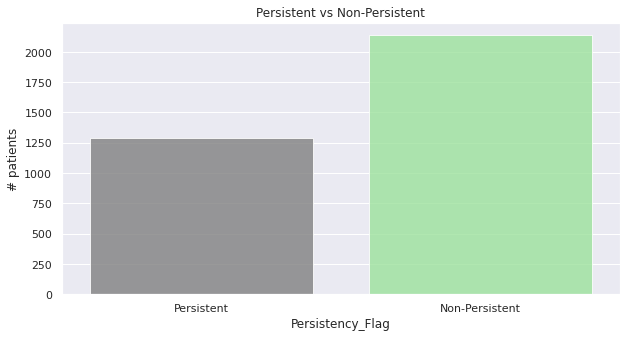

In [ ]:
# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['Persistency_Flag'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Persistent vs Non-Persistent')
plt.ylabel('# patients')
plt.show()


class imbalance present

In [ ]:
df.Persistency_Flag.value_counts(normalize= True)

Non-Persistent    0.62354
Persistent        0.37646
Name: Persistency_Flag, dtype: float64

In [ ]:
def rstr(df, pred=None):

    obs = df.shape[0]

    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    #print(counts)
    uniques = df.apply(lambda x: x.unique())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    #print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str


In [ ]:
details = rstr(df)
details.transpose()

___________________________
Data types:
 object    63
int64      2
Name: types, dtype: int64
___________________________


Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Adherent_Flag                Age_Bucket  \
types                             object                    object   
counts                              3424                      3424   
distincts                              2                         4   
nulls                                  0                         0   
missing ration                       0.0                       0.0   
uniques         [Adherent, Non-Adherent]  [>75, 55-65, 65-75, <55]   
skewness                             NaN                       NaN   
kurtosis                             NaN                       NaN   

                                     Change_Risk_Segment  \
types                                             object   
counts                                              3424   
distincts                                              4   
nulls                                                  0   
missing ration                                       0.0   
uniques         [Unknown, No change, Worsened, Improved]   
skewness                                             NaN   
kurtosis                                             NaN   

                                          Change_T_Score  \
types                                             object   
counts                                              3424   
distincts                                              4   
nulls                                                  0   
missing ration                                       0.0   
uniques         [No change, Unknown, Worsened, Improved]   
skewness                                             NaN   
kurtosis                                             NaN   

               Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias  \
types                                                      object                
counts                                                       3424                
distincts                                                       2                
nulls                                                           0                
missing ration                                                0.0                
uniques                                                    [N, Y]                
skewness                                                      NaN                
kurtosis                                                      NaN                

               Comorb_Dorsalgia  \
types                    object   
counts                     3424   
distincts                     2   
nulls                         0   
missing ration              0.0   
uniques                  [Y, N]   
skewness                    NaN   
kurtosis                    NaN   

               Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx  \
types                                                      object                
counts                                                       3424                
distincts                                                       2                
nulls                                                           0                
missing ration                                                0.0                
uniques                                                    [Y, N]                
skewness                                                      NaN                
kurtosis                                                      NaN                

               Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx  \
types                                                      object                   
counts                                                       3424                   
distincts                                                       2                   
nulls                                                           0                   
missing ration                                                0.0                   
uniques   

In [ ]:
df['y']= np.where(df.Persistency_Flag=='Persistent',1,0)
df.drop(['Persistency_Flag','Ptid'],1, inplace=True)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
def getCategFeat(df, n, target):
    """
    get dataframe's categorical features 
    Inputs :
        df     -- dataframe  
        n      -- min modalities for numerical features
        target -- target column name
    """
    return [c for c in df.columns if (df[c].dtype == 'O' or df[c].nunique()<n) and c!=target]

In [ ]:
categorical_features = getCategFeat(df,7,'y')
print("Categorical Features : ",categorical_features)
numerical_features = [c for c in df.columns if c not in categorical_features and c!="classification"]
print("Numerical Features : ", numerical_features)

Categorical Features :  ['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_patho

In [ ]:
def plot_numeric(data, numeric_features, target) :
    """ 
    plots analysing numerical features
    Inputs : 
        data -- dataframe containing features to plot
        numeric_features -- list of numerical features
        target -- target column name
     """
    # Looping through and Plotting Numeric features
    for column in numeric_features:    
        # Figure initiation
        fig = plt.figure(figsize=(18,12))

        ### Distribution plot
        sns.distplot(data[column], ax=plt.subplot(221));
        # X-axis Label
        plt.xlabel(column, fontsize=14);
        # Y-axis Label
        plt.ylabel('Density', fontsize=14);
        # Adding Super Title (One for a whole figure)
        plt.suptitle('Plots for '+column, fontsize=18);

        ### Distribution per Positive / Negative class Value
        # Not Survived hist
        classes = data[target].unique()
        sns.distplot(data.loc[data[target]==classes[0], column].dropna(),
                     color='red', label=str(classes[0]), ax=plt.subplot(222));
        # Survived hist
        sns.distplot(data.loc[data[target]==classes[1], column].dropna(),
                     color='blue', label=str(classes[1]), ax=plt.subplot(222));
        # Adding Legend
        plt.legend(loc='best')
        # X-axis Label
        plt.xlabel(column, fontsize=14);
        # Y-axis Label
        plt.ylabel('Density per '+ str(classes[0])+' / '+str(classes[1]), fontsize=14);

        ### Average Column value per positive / Negative Value
        sns.barplot(x=target, y=column, data=data, ax=plt.subplot(223));
        # X-axis Label
        plt.xlabel('Positive or Negative?', fontsize=14);
        # Y-axis Label
        plt.ylabel('Average ' + column, fontsize=14);

        ### Boxplot of Column per Positive / Negative class Value
        sns.boxplot(x=target, y=column, data=data, ax=plt.subplot(224));
        # X-axis Label
        plt.xlabel('Positive or Negative ?', fontsize=14);
        # Y-axis Label
        plt.ylabel(column, fontsize=14);
        # Printing Chart
        plt.show()
        
def plot_categ(train_data, target, nominal_features,positive =1) :
    """ 
    plots analysing nominal categorical features
    Inputs : 
        data -- dataframe containing features to plot
        nominal_features -- list of nominal features
        target -- target column name
     """
    # Looping through and Plotting Categorical features
    for column in nominal_features:
    # Figure initiation
        fig = plt.figure(figsize=(18,12))
        
        ### Number of occurrences per categoty - target pair
        ax = sns.countplot(x=column, hue=target, data=train_data, ax = plt.subplot(211));
        # X-axis Label
        plt.xlabel(column, fontsize=14);
        # Y-axis Label
        plt.ylabel('Number of occurrences', fontsize=14);
        # Adding Super Title (One for a whole figure)
        plt.suptitle('Plots for '+column, fontsize=18);
        # Setting Legend location 
        plt.legend(loc=1);

        ### Adding percents over bars
        # Getting heights of our bars
        height = [p.get_height() if np.isnan(p.get_height()) == 0 else 0 for p in ax.patches] #  get nan if
        # Counting number of bar groups 
        ncol = int(len(height)/2)
        # Counting total height of groups
        total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
        # Looping through bars
        for i, p in enumerate(ax.patches):    
            # Adding percentages
            ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                    '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

        negative = train_data[target].unique()[0] if train_data[target].unique()[0] != positive else train_data[target].unique()[1]
        ### Positive class percentage for every value of feature
        
        sns.pointplot(x=train_data[column], y=train_data[target].map({negative:0 , positive: 1}), ax = plt.subplot(212));
        # X-axis Label
        plt.xlabel(column, fontsize=14);
        # Y-axis Label
        plt.ylabel(' Positive class percentage', fontsize=14);
        # Printing Chart
        plt.show()


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


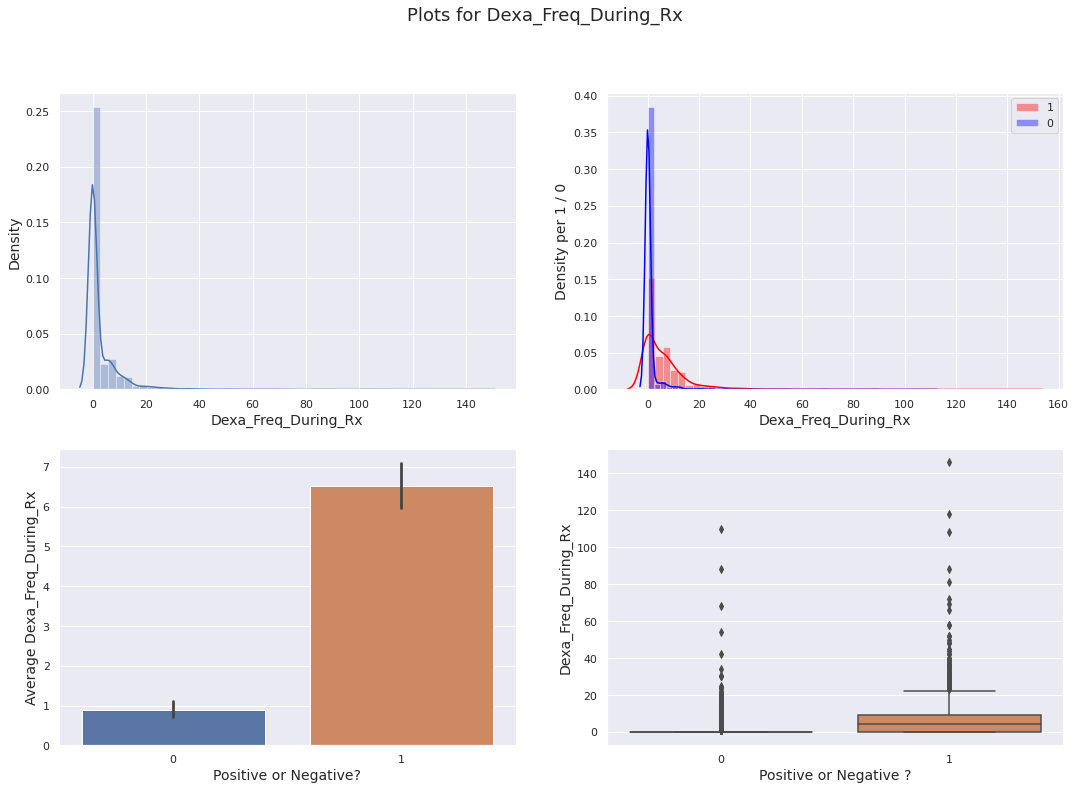

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


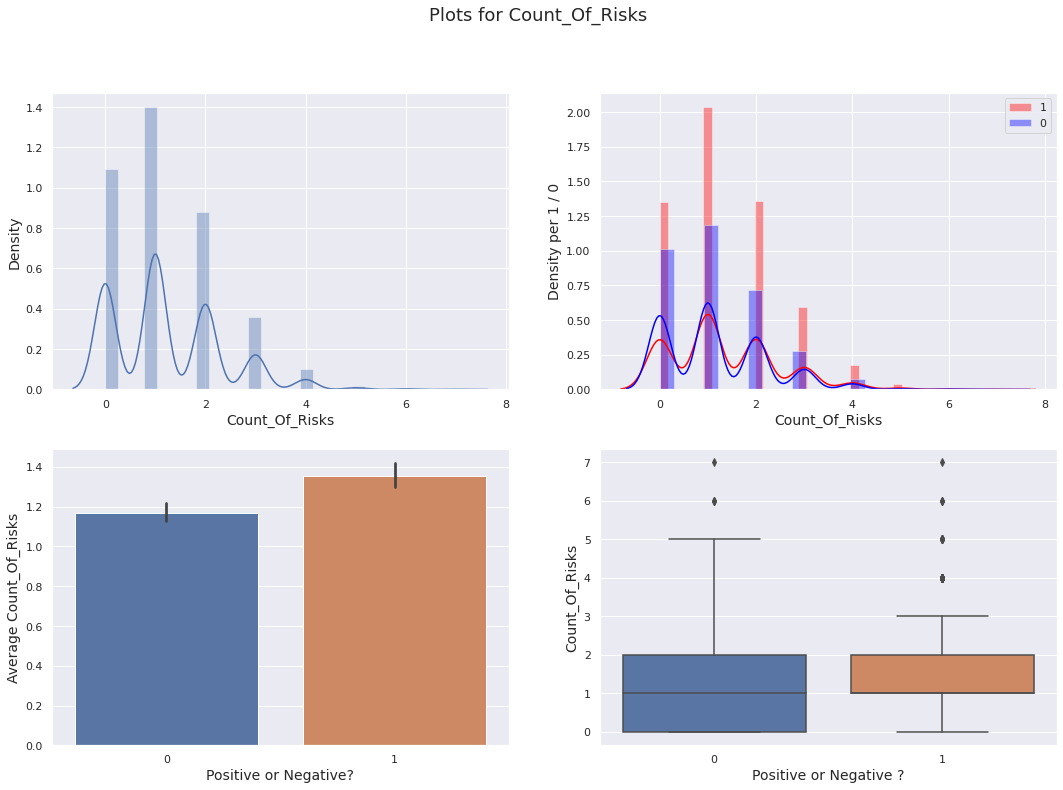

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level

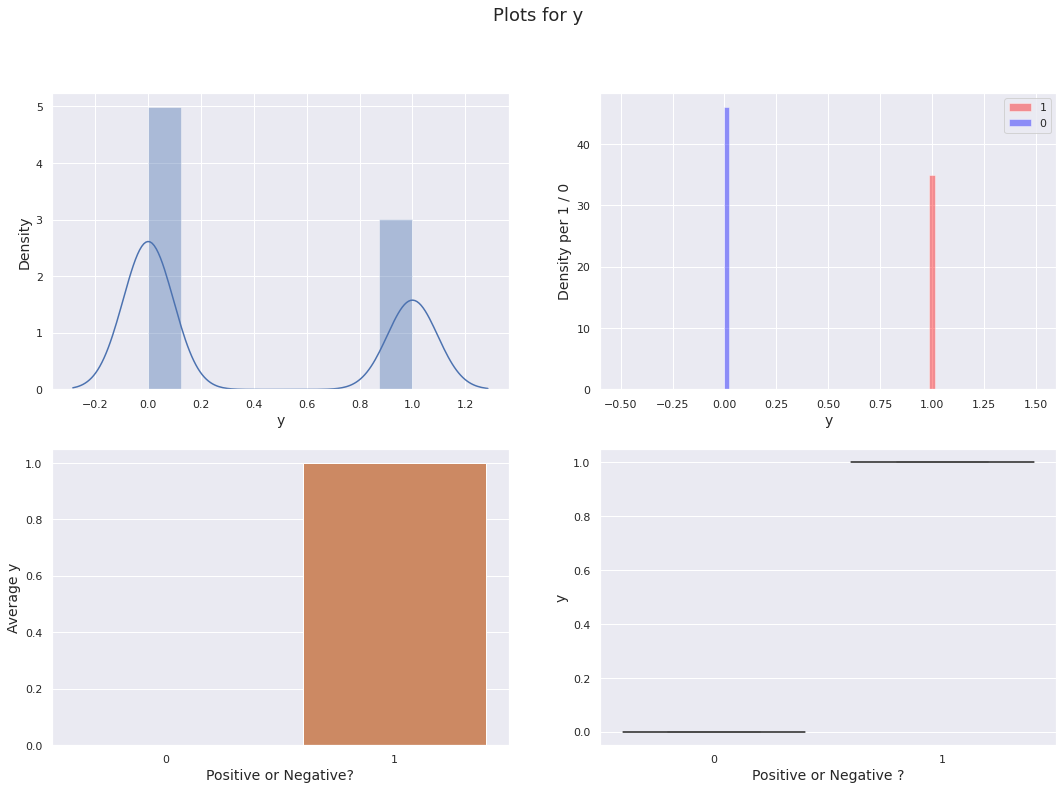

In [ ]:
### Plotting Numeric Features
plot_numeric(df, numerical_features, 'y')

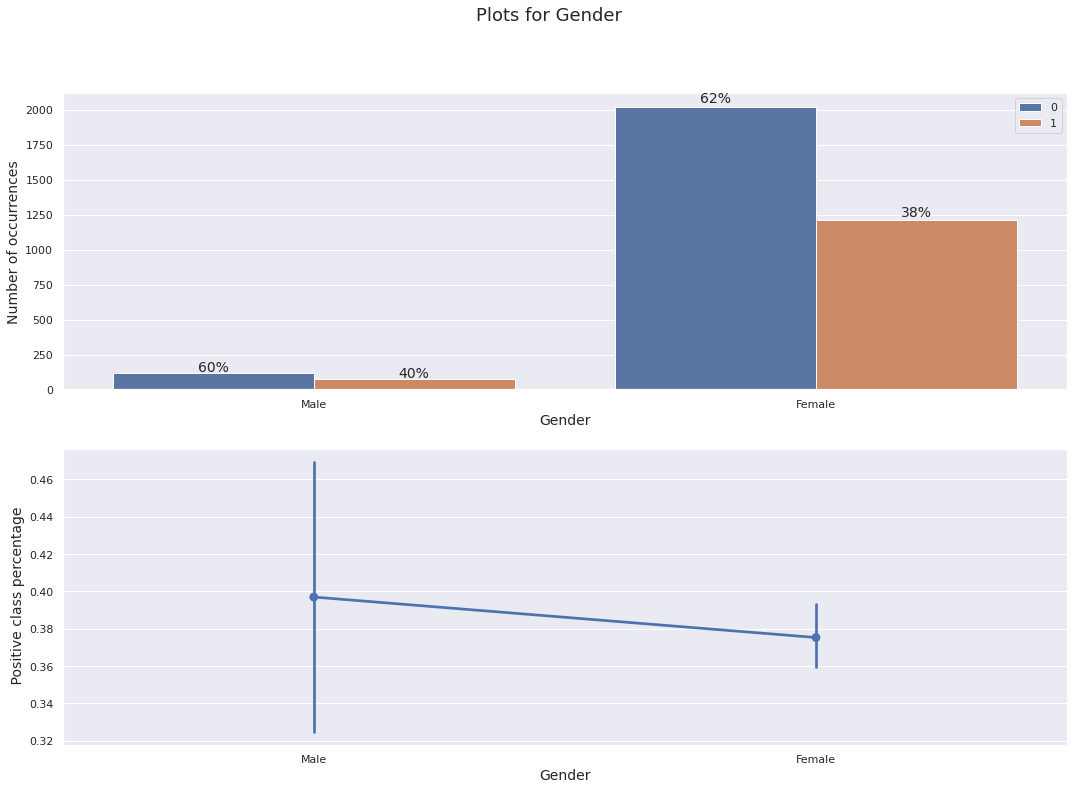

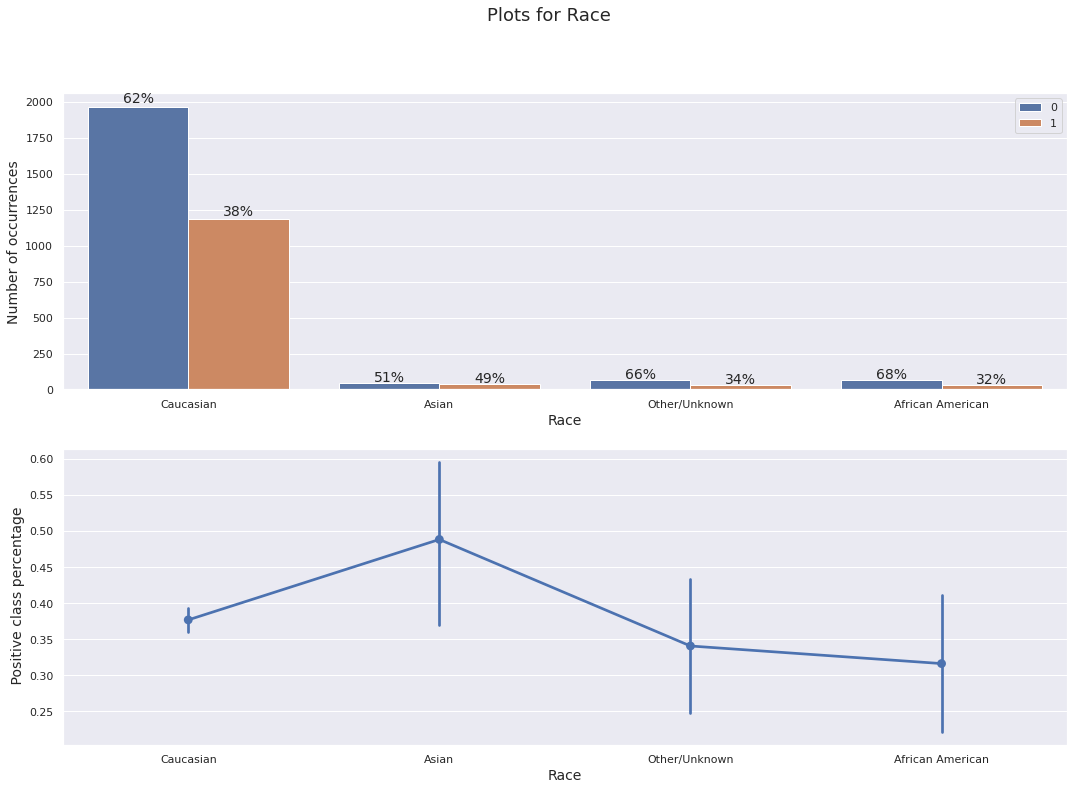

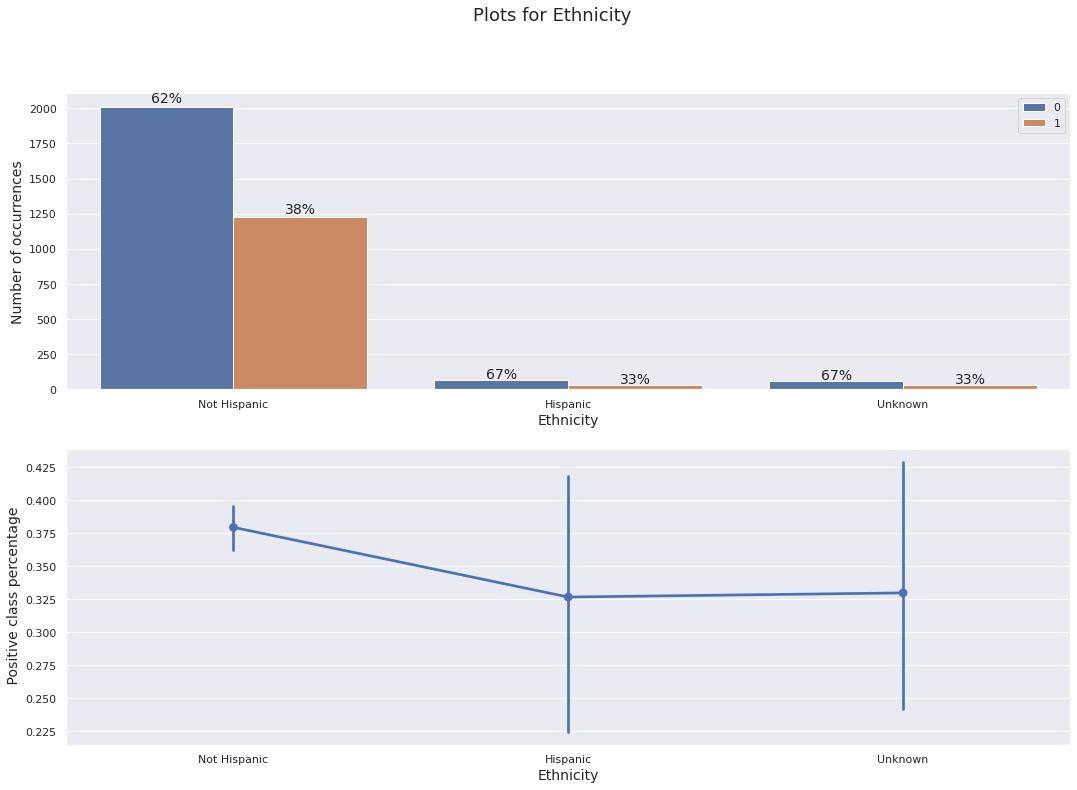

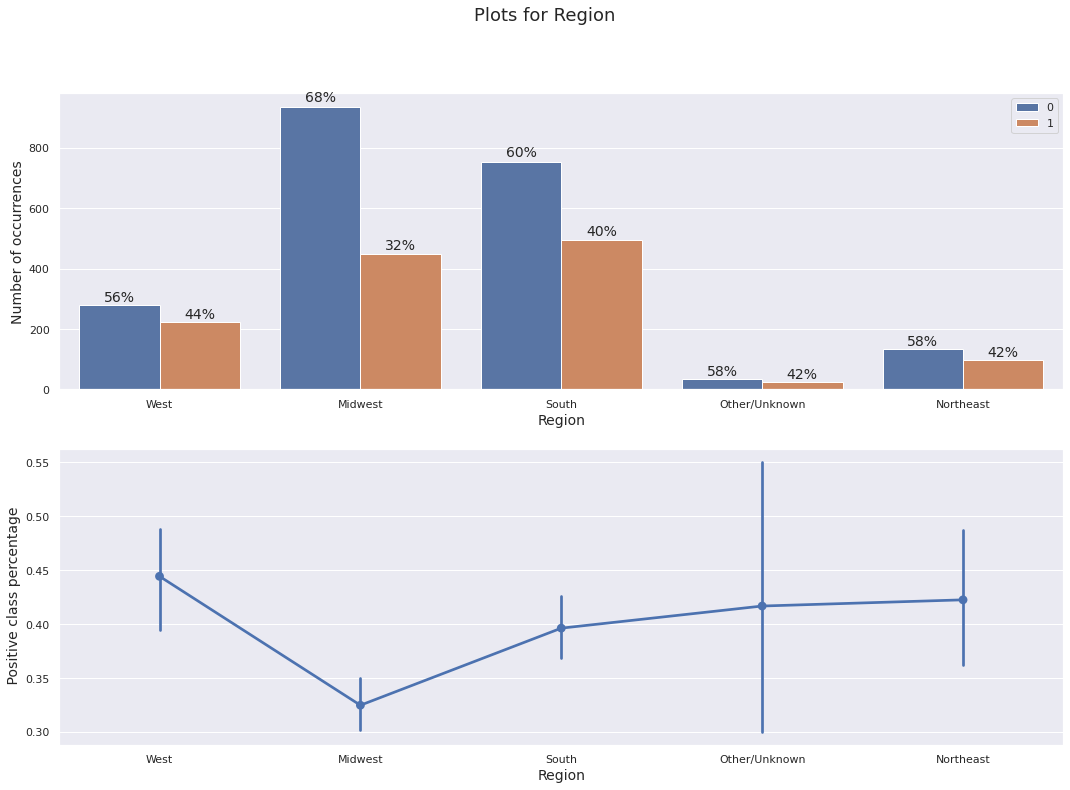

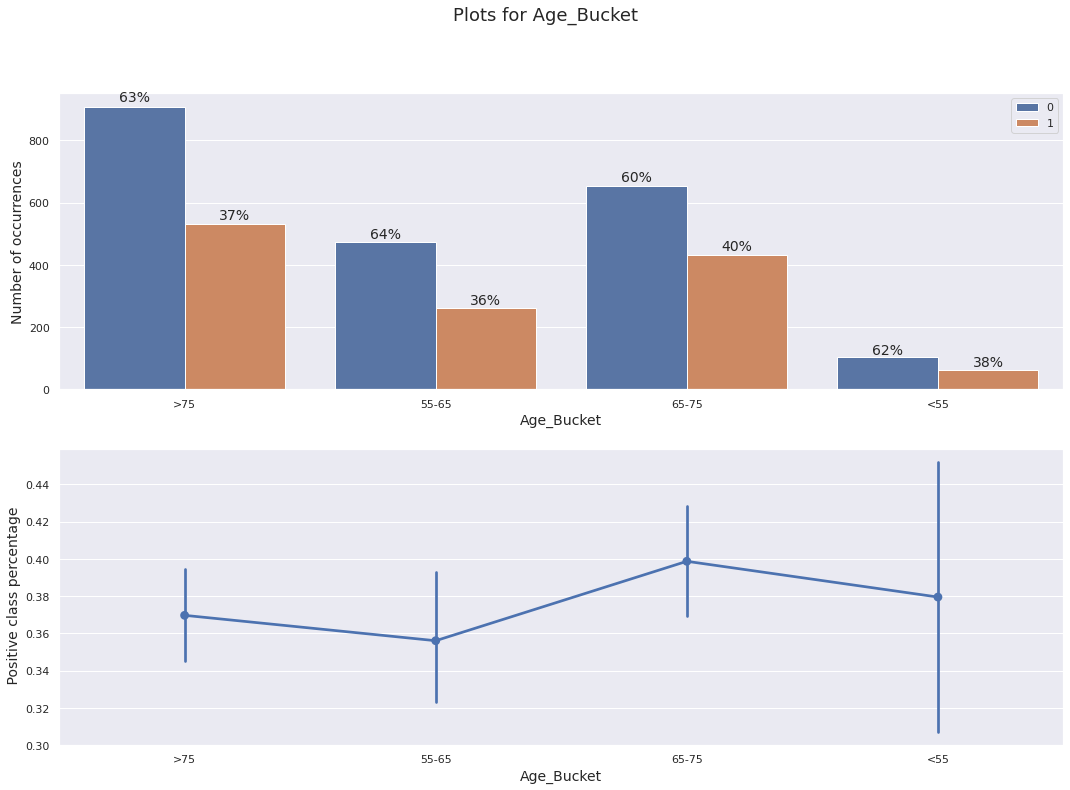

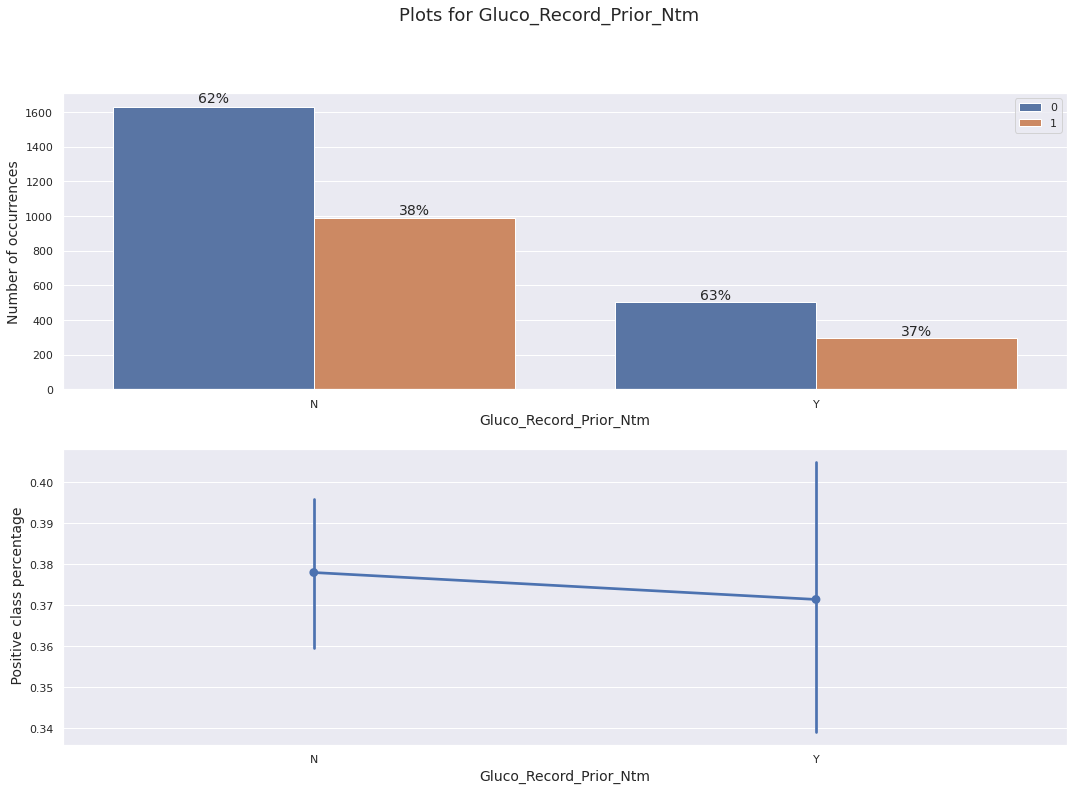

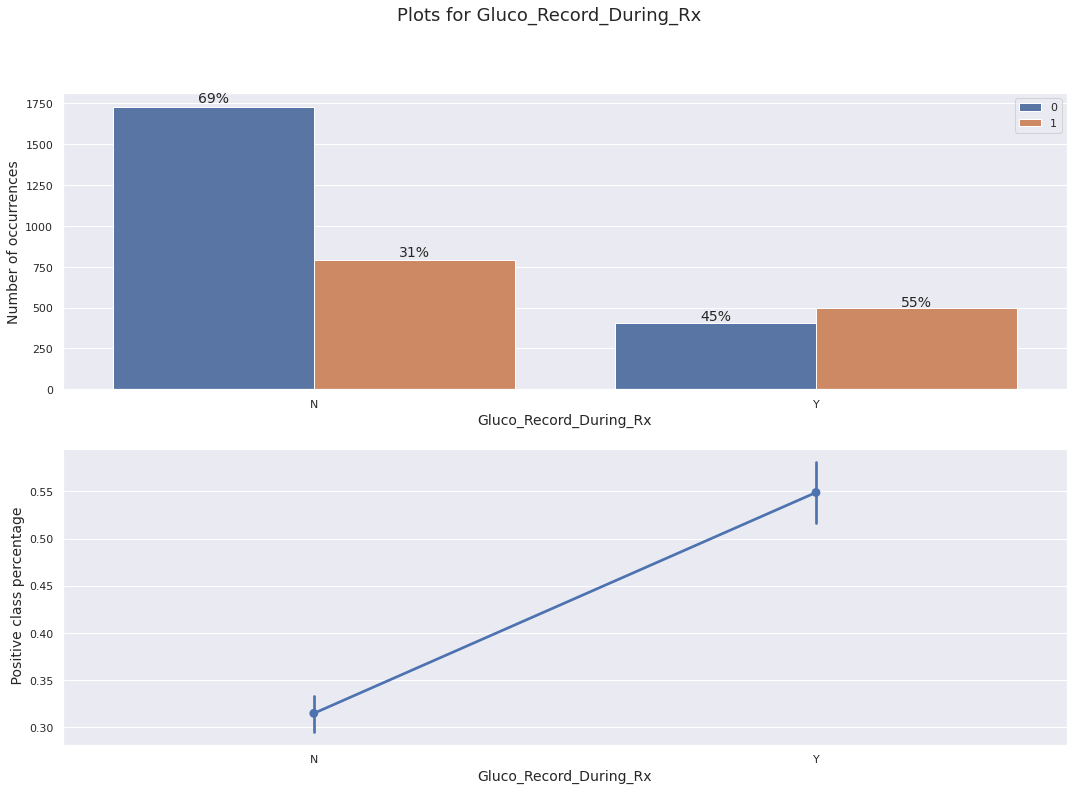

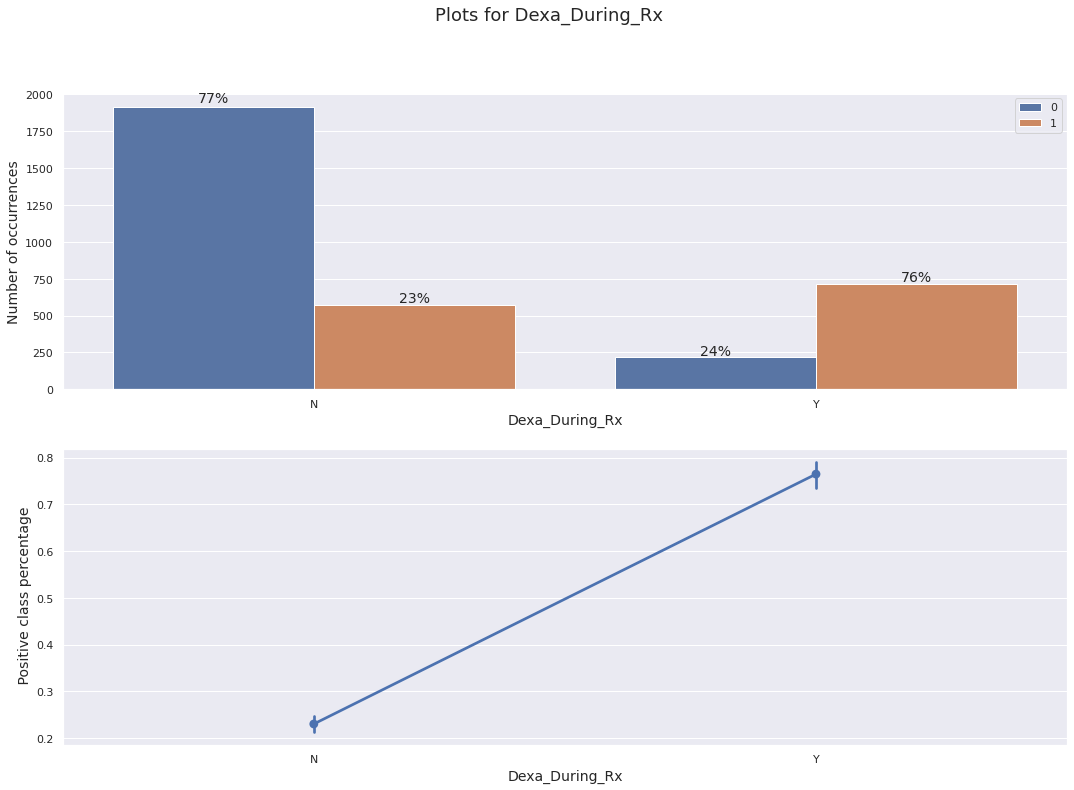

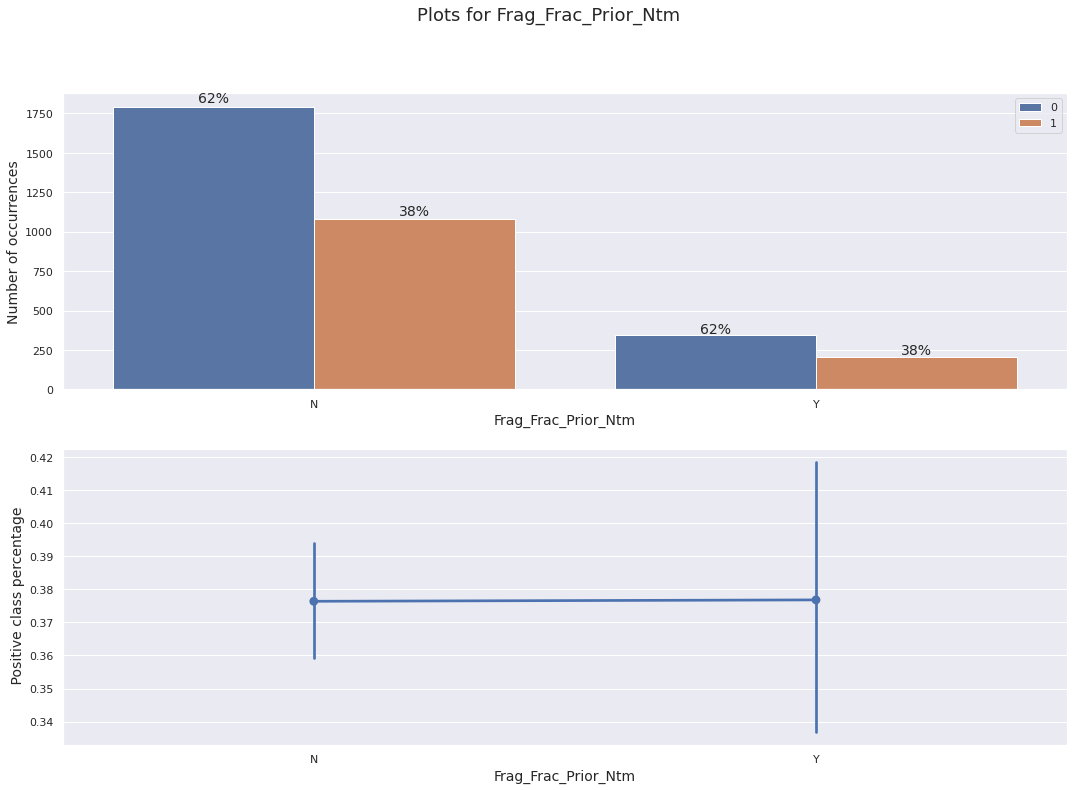

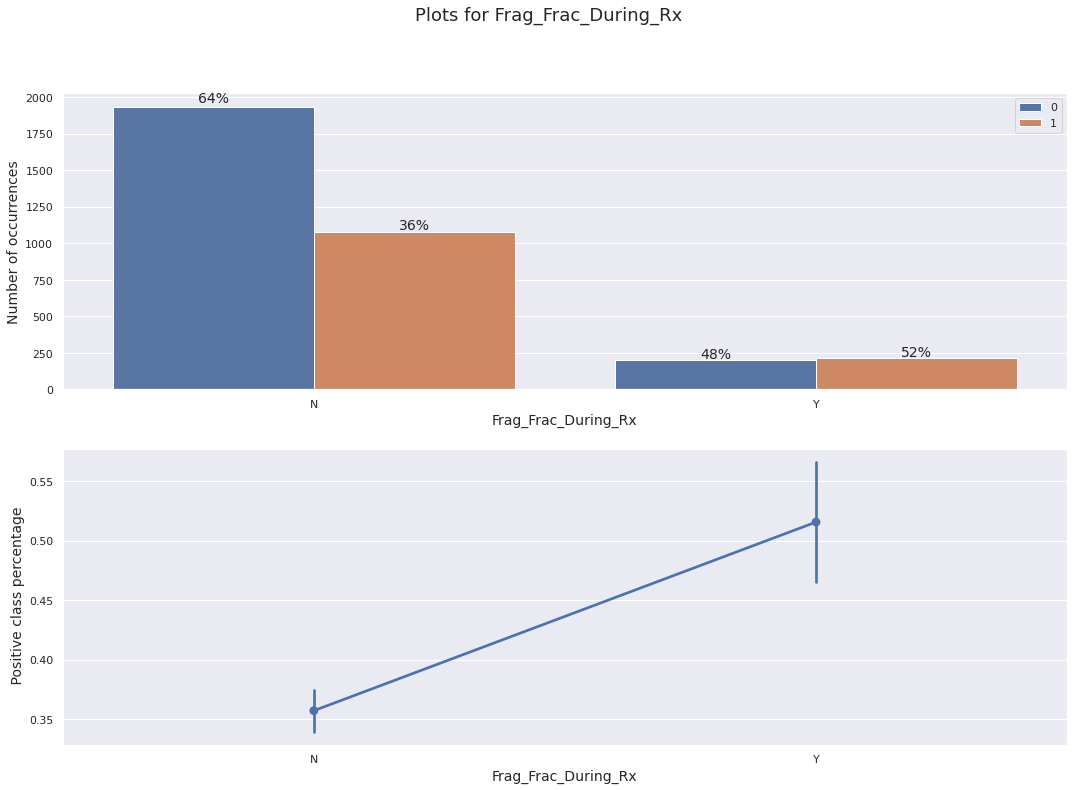

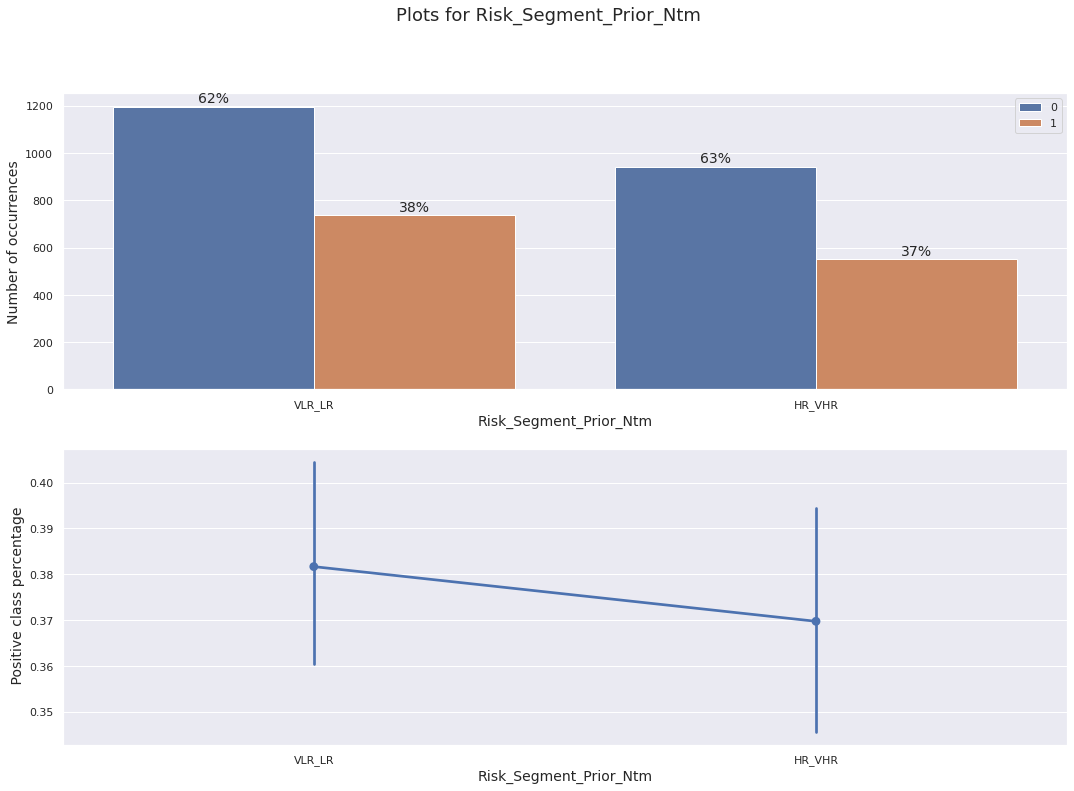

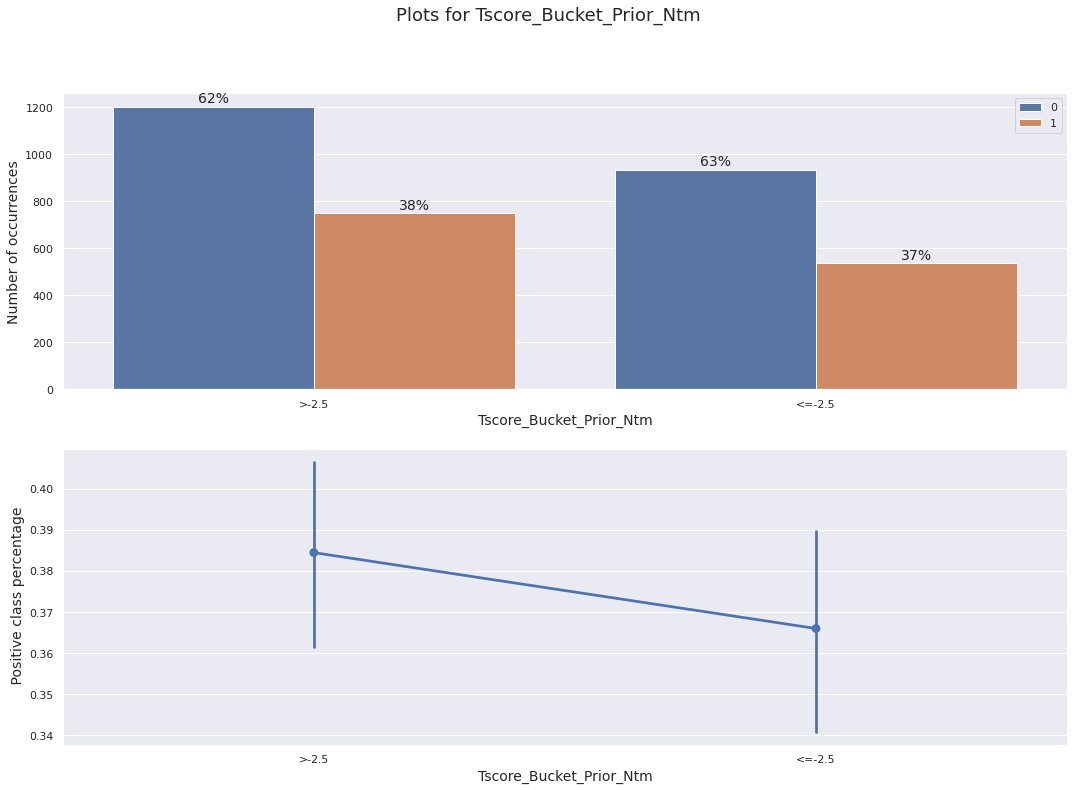

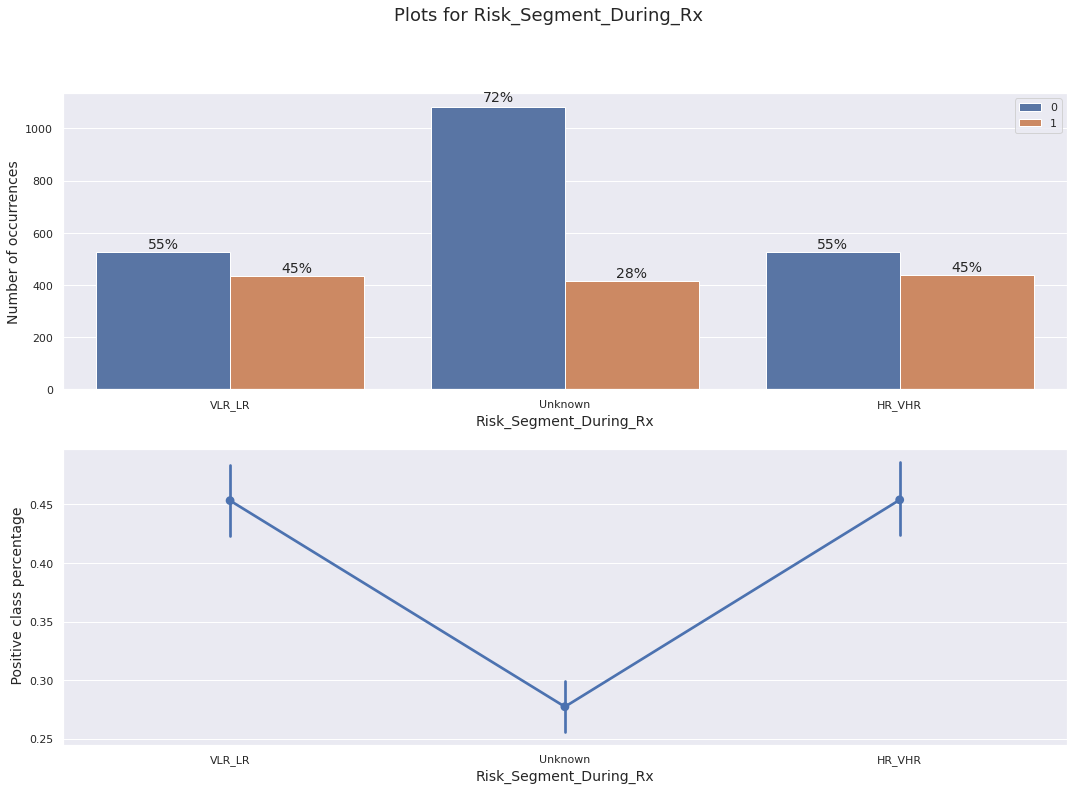

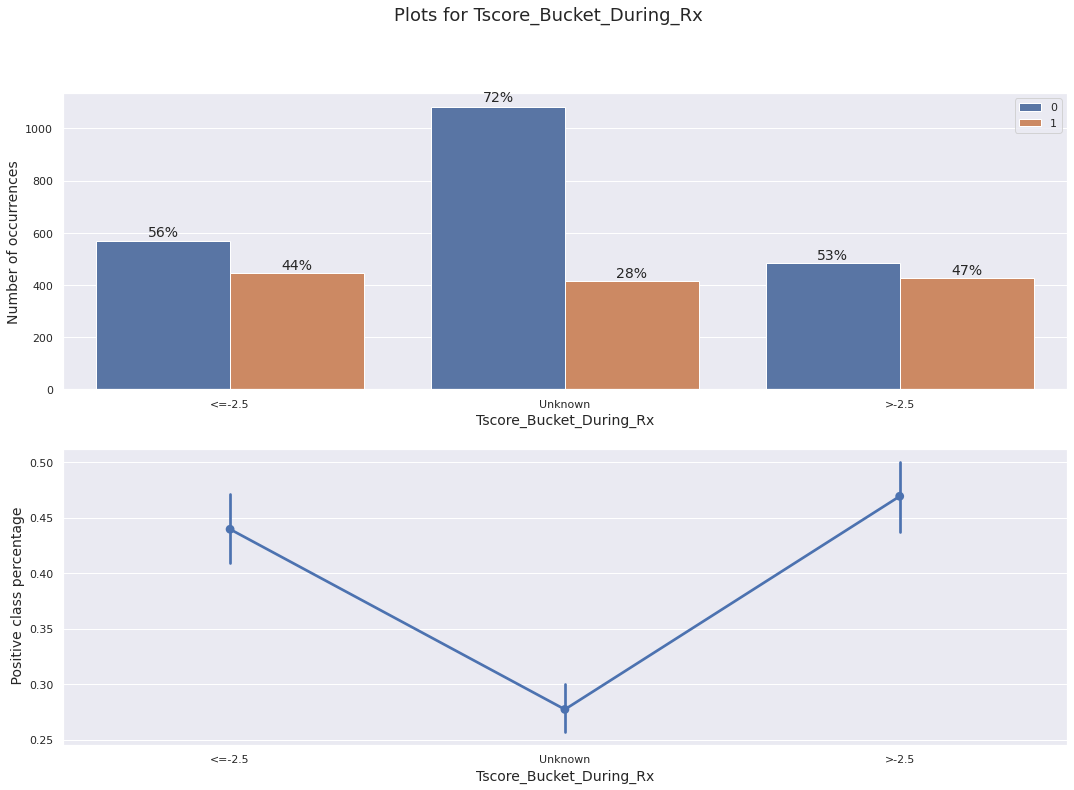

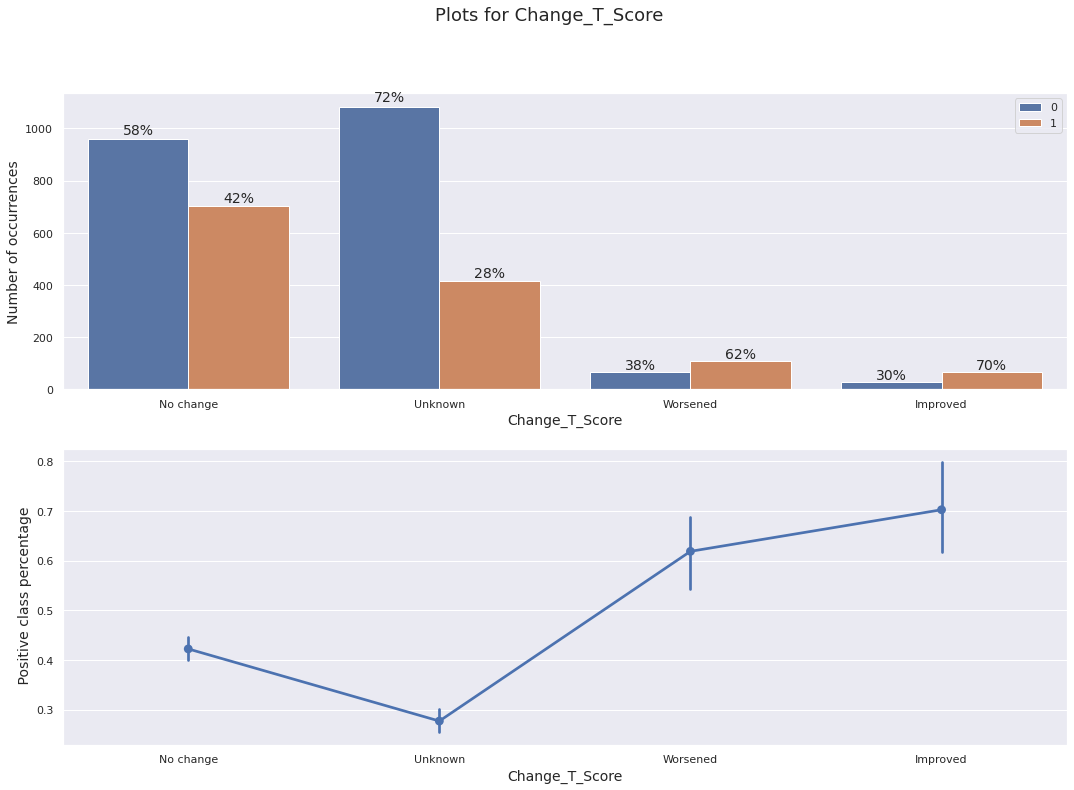

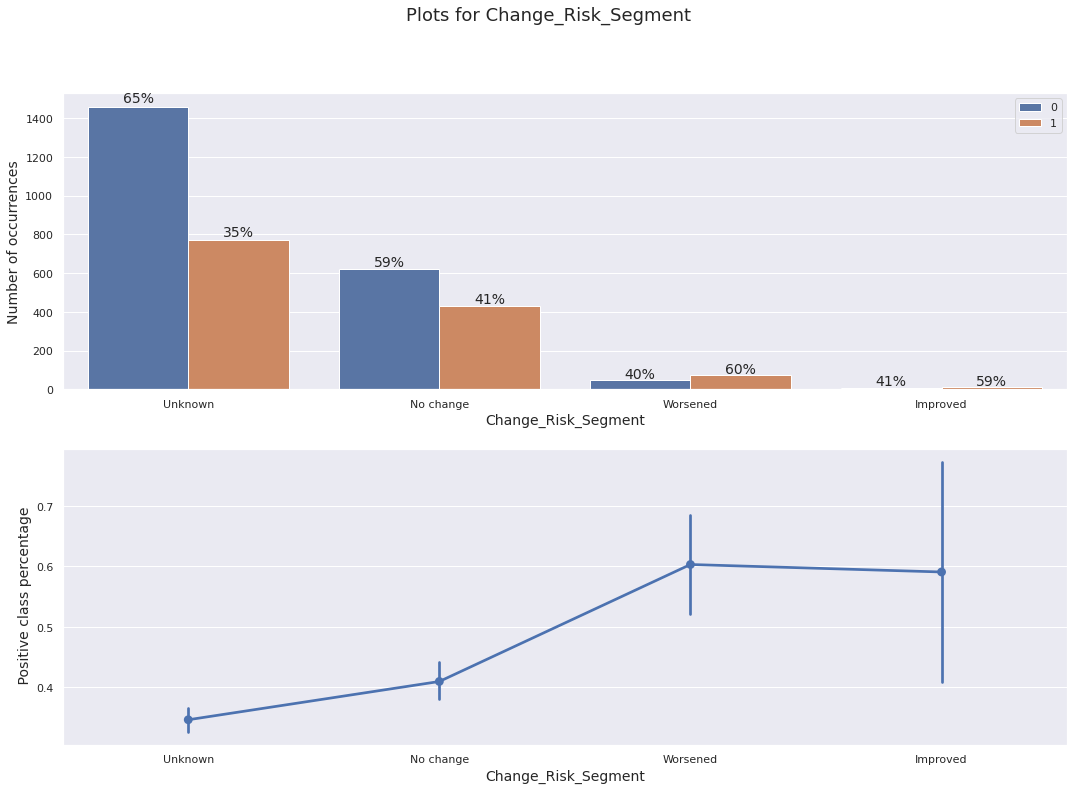

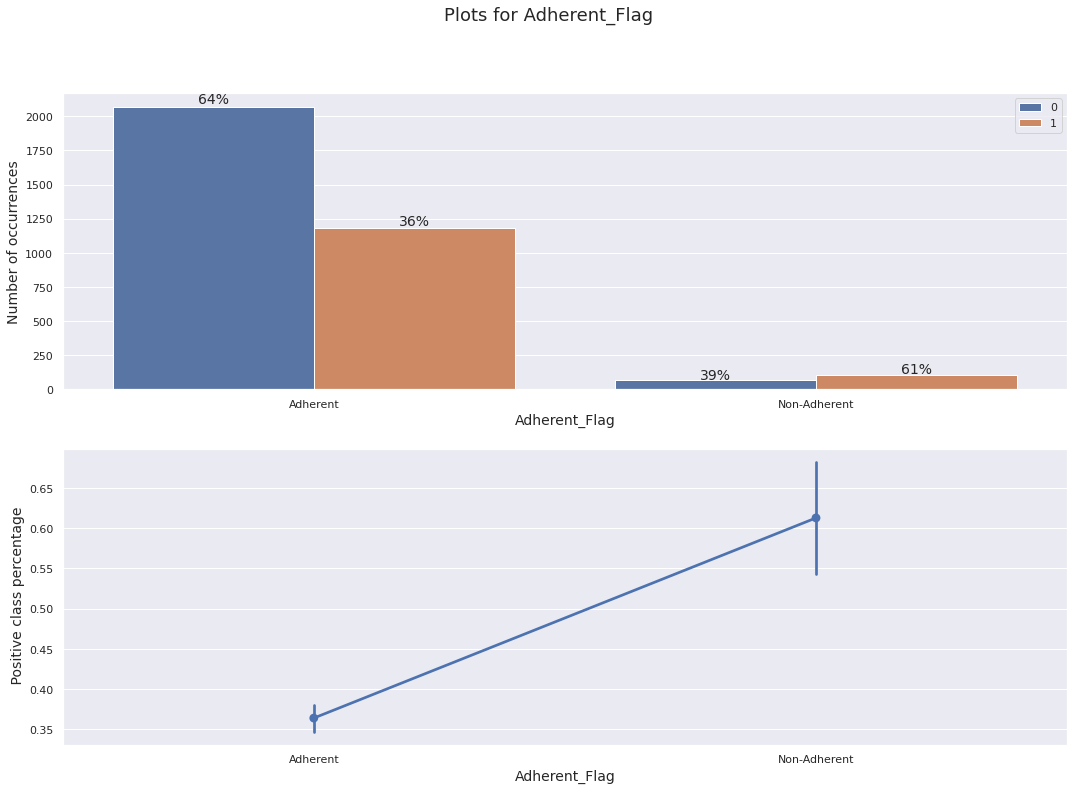

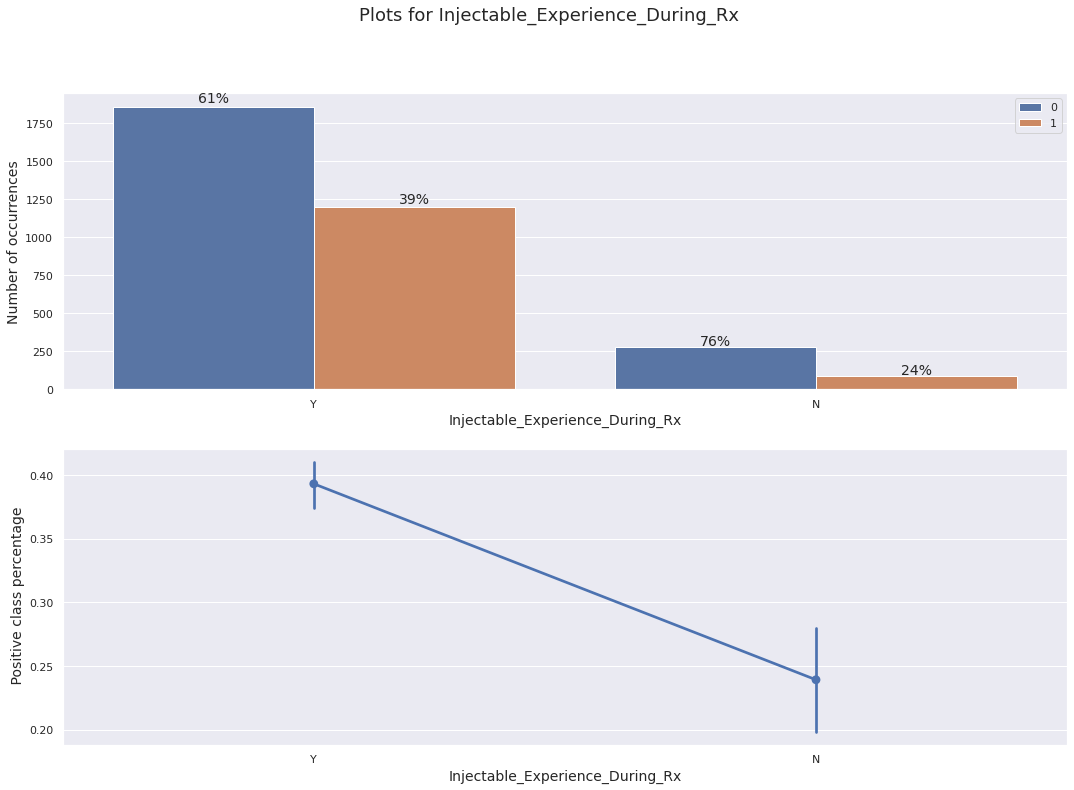

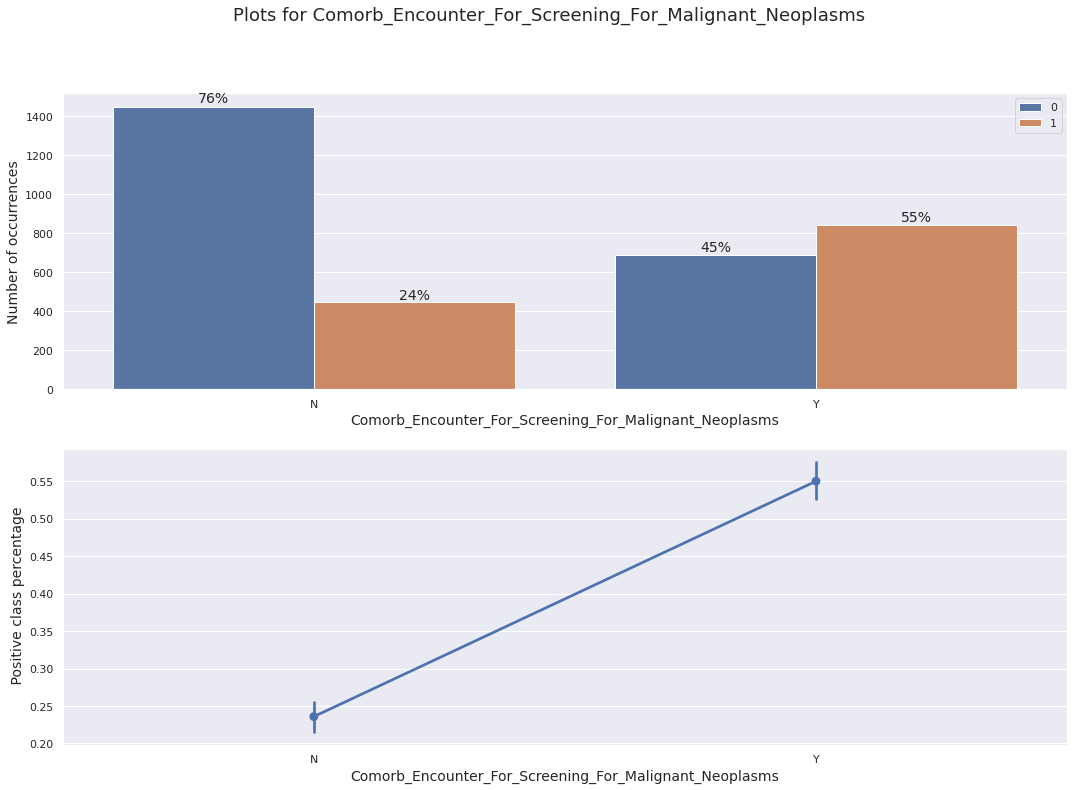

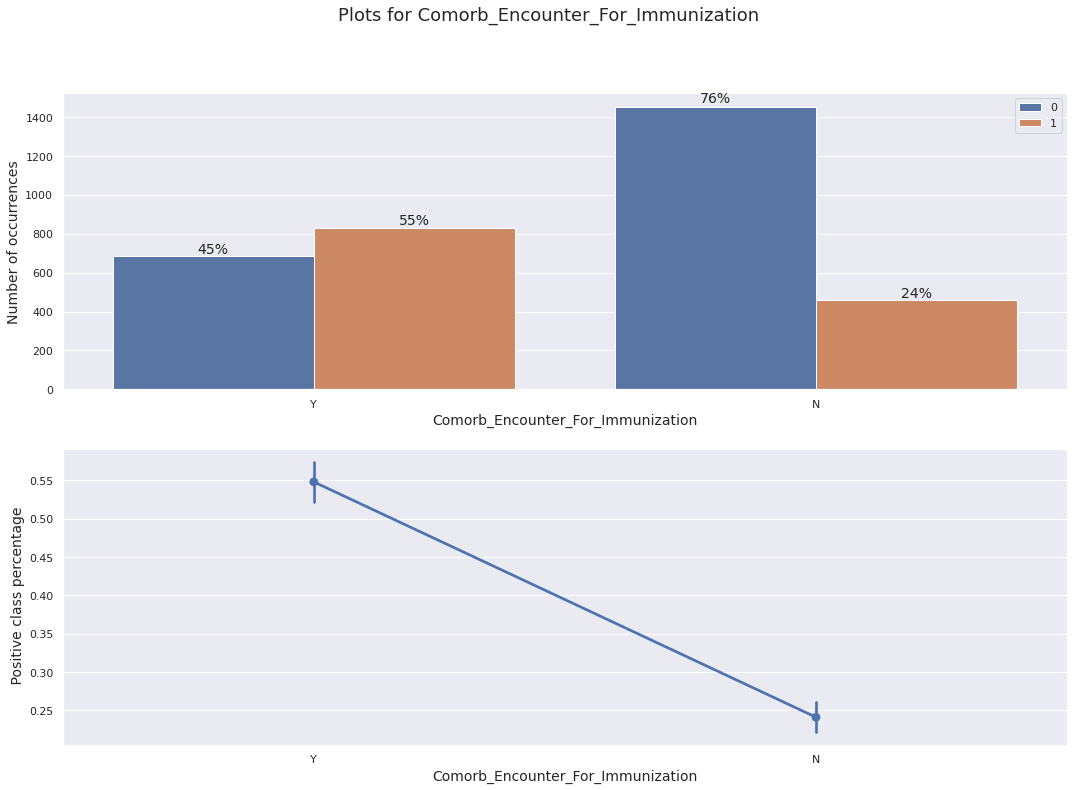

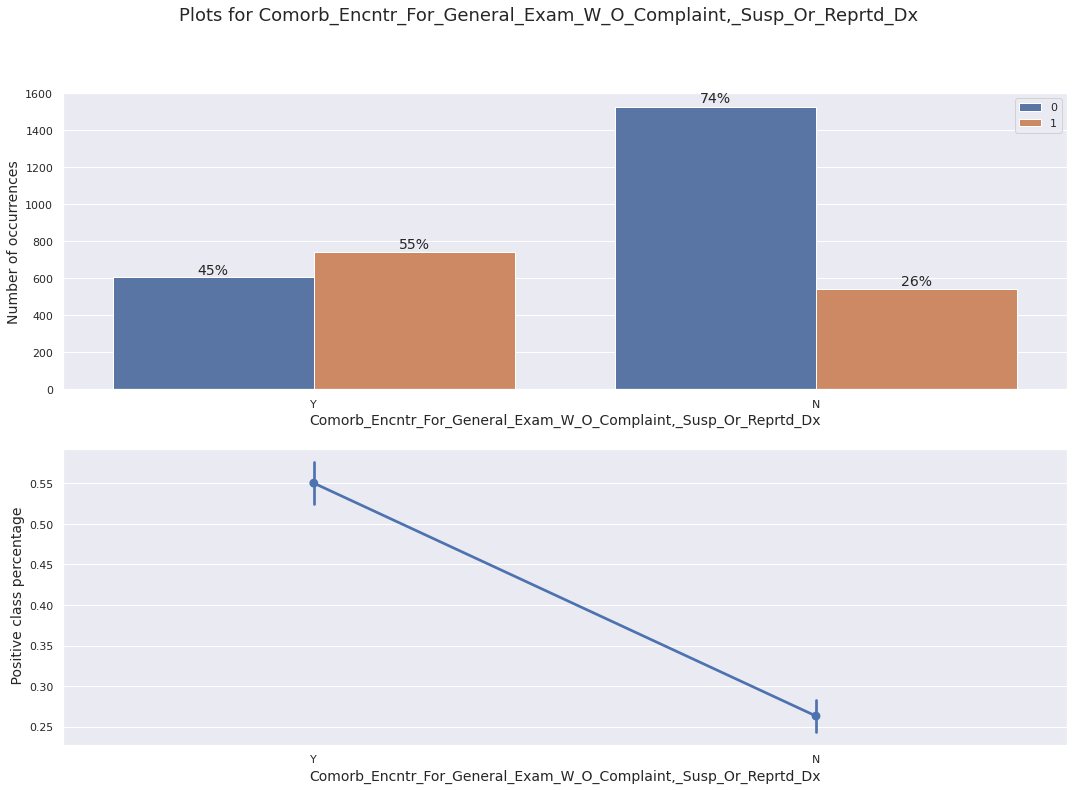

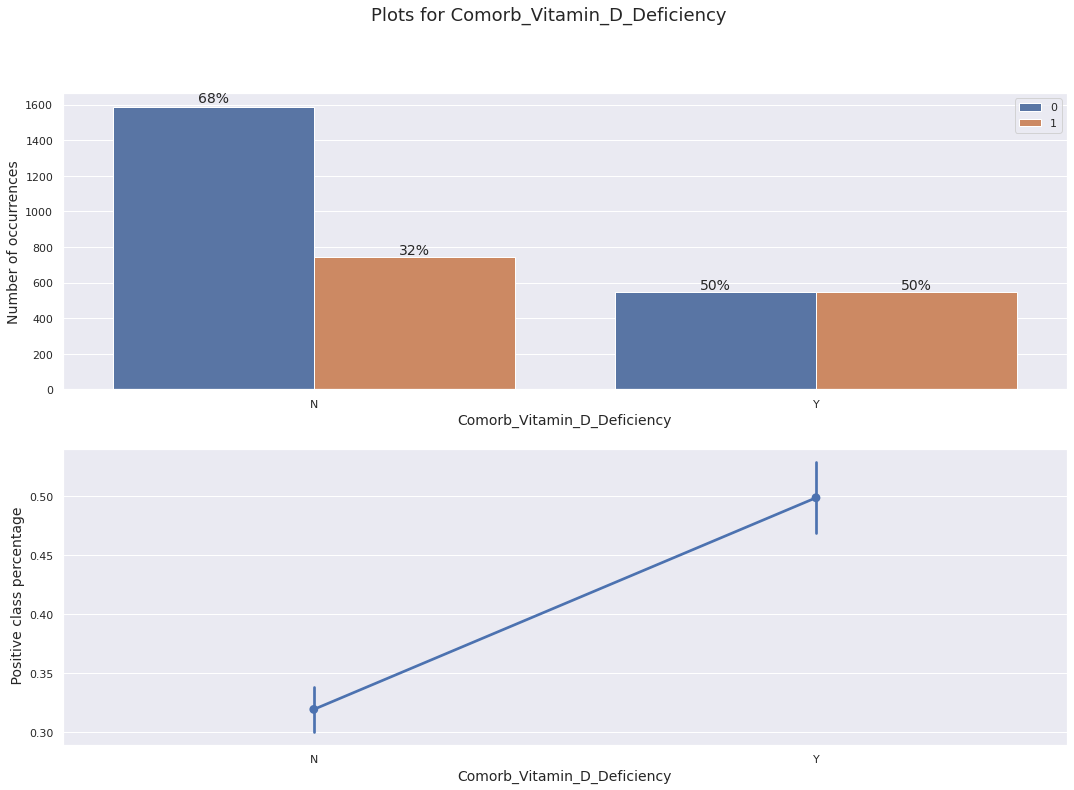

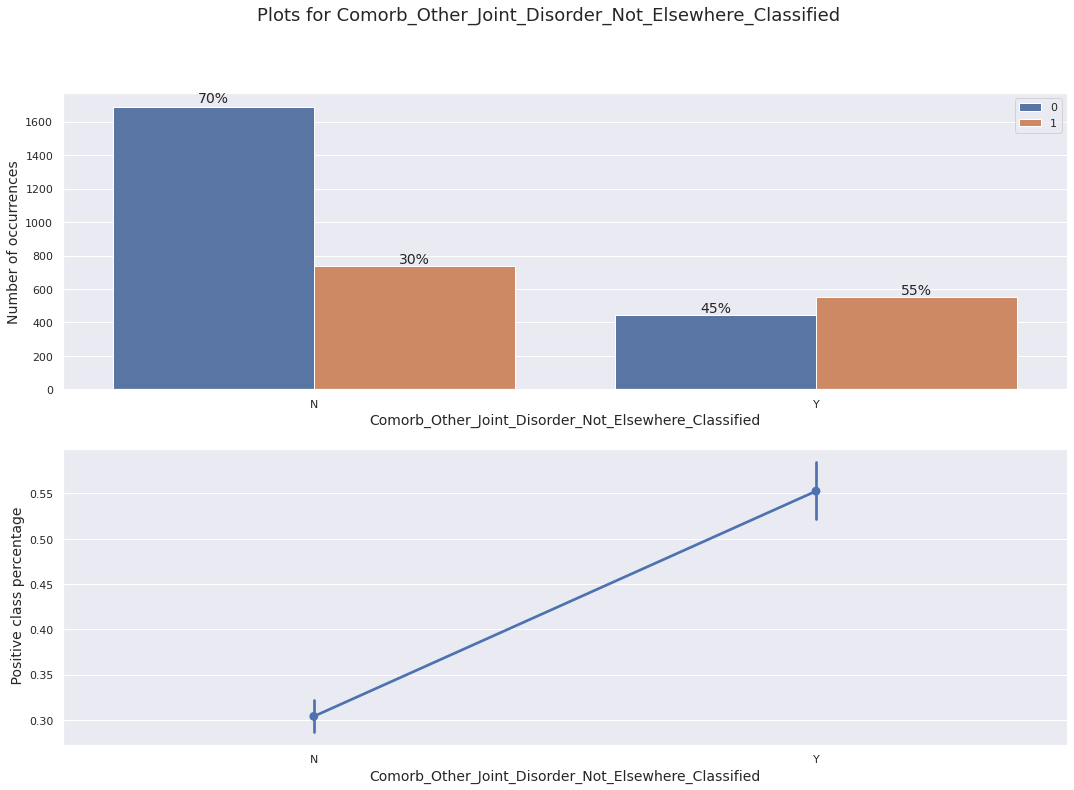

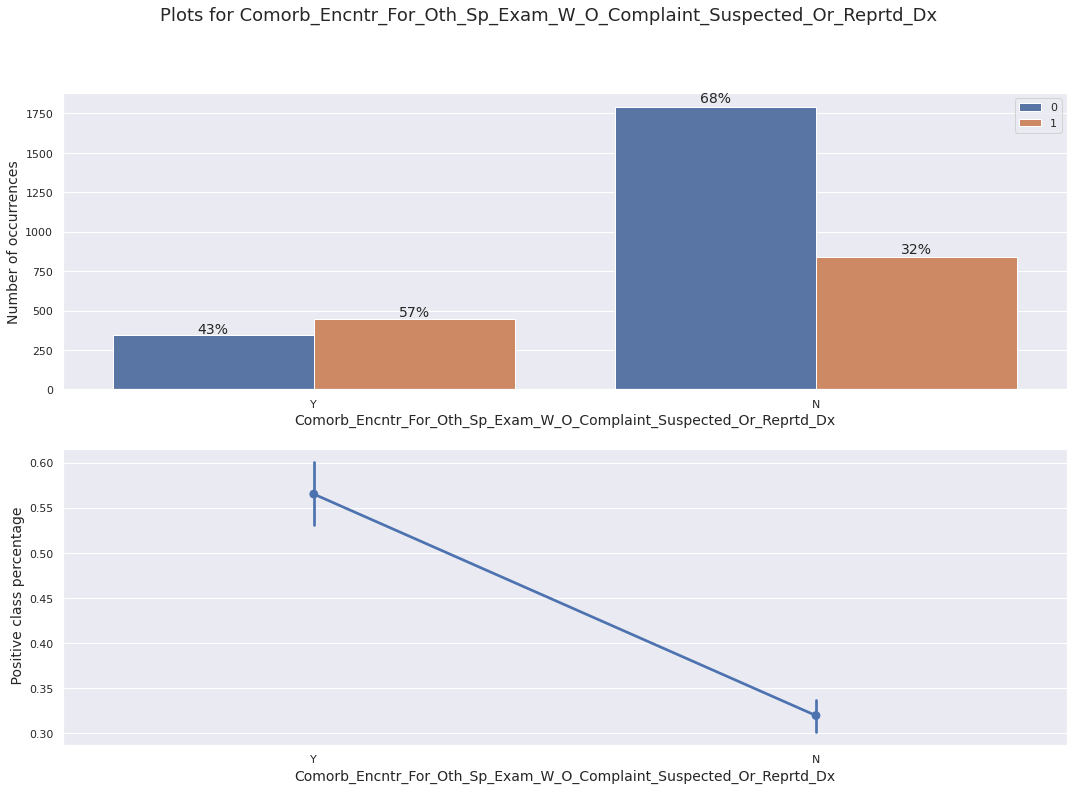

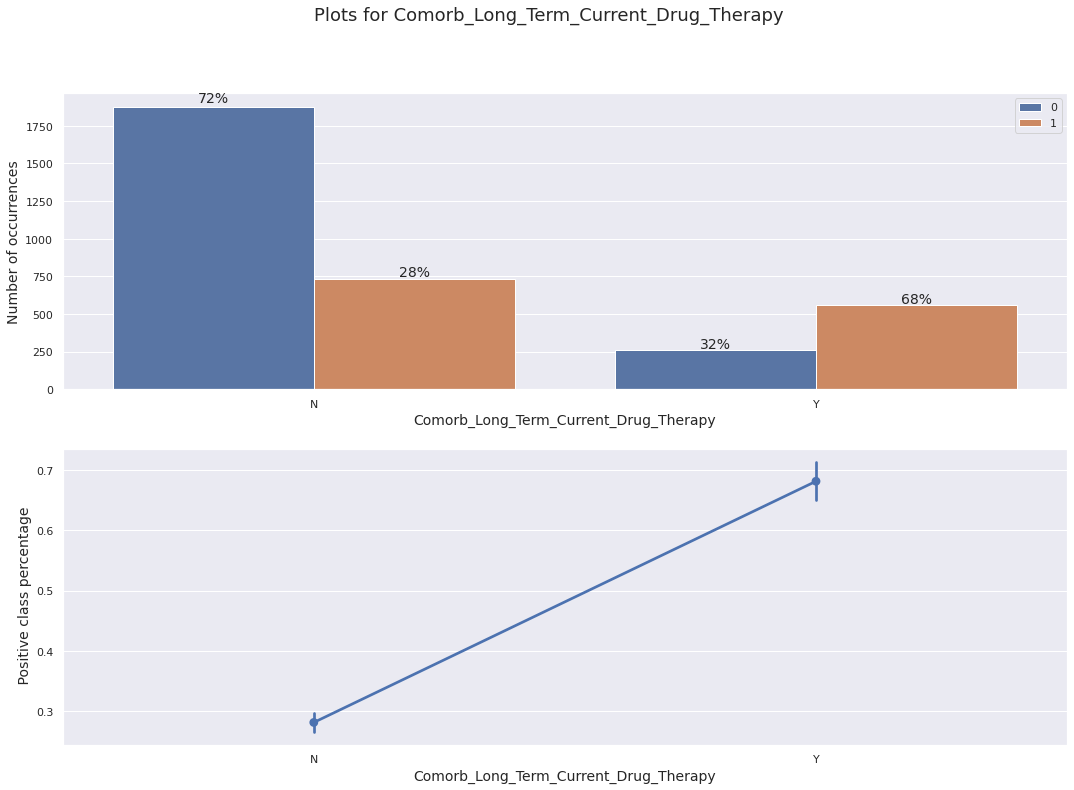

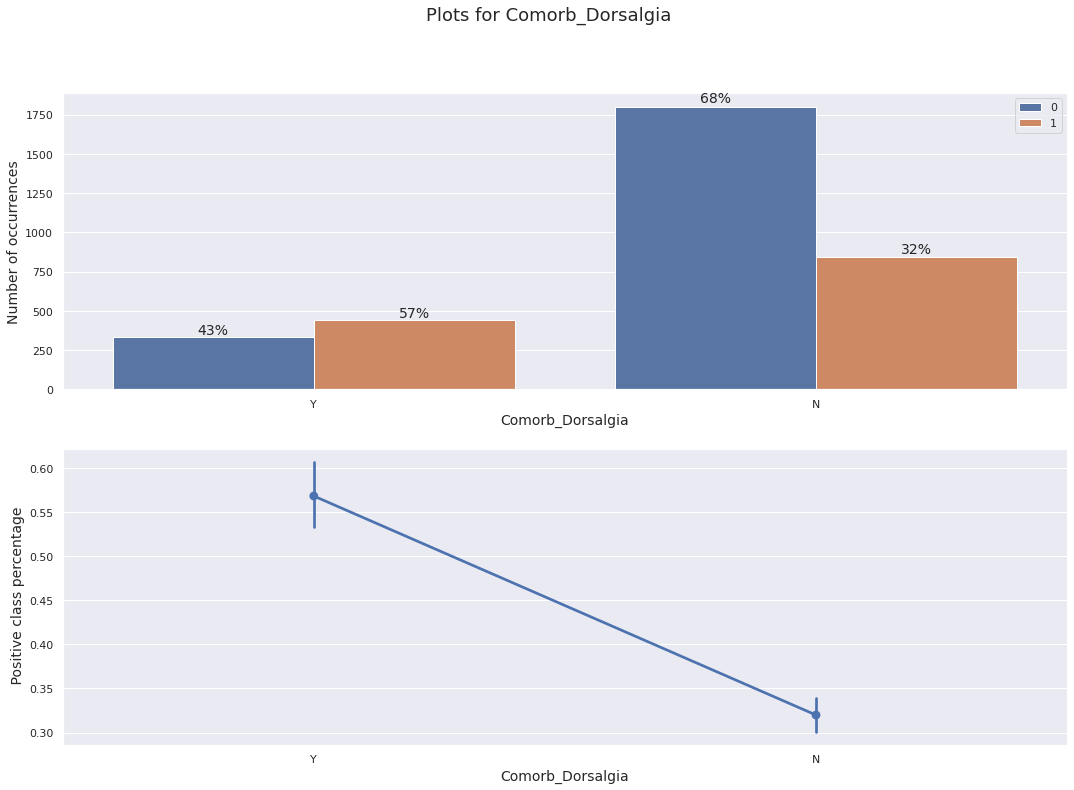

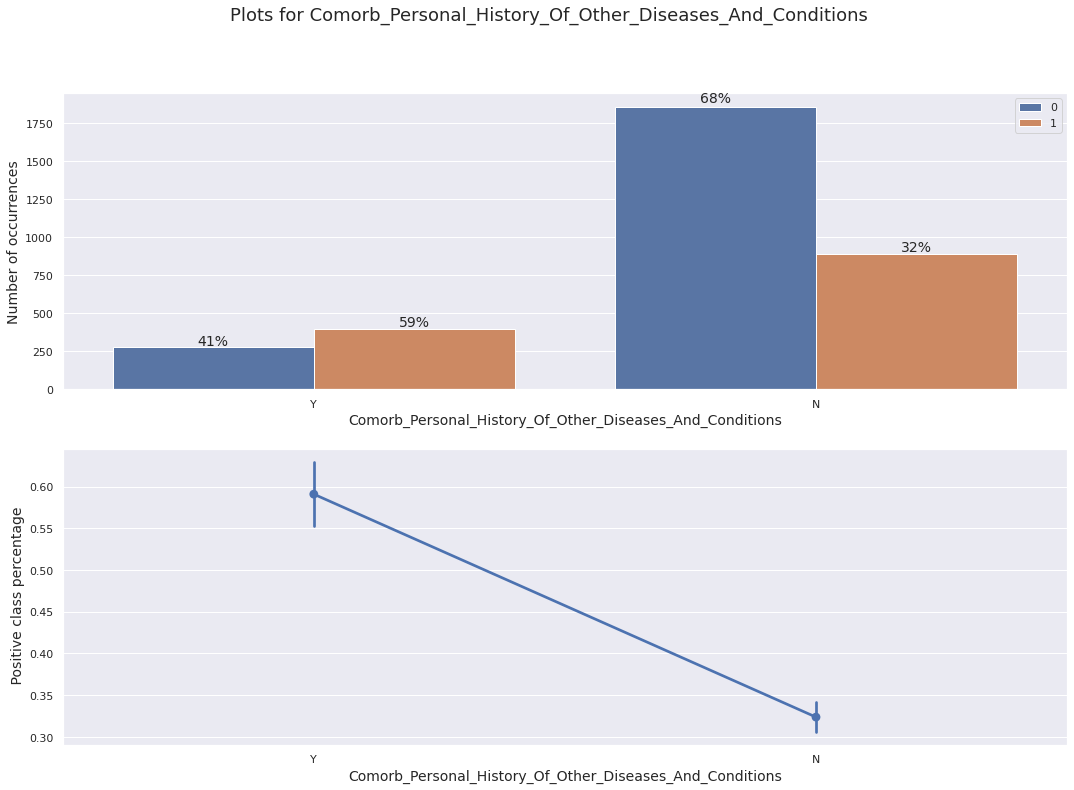

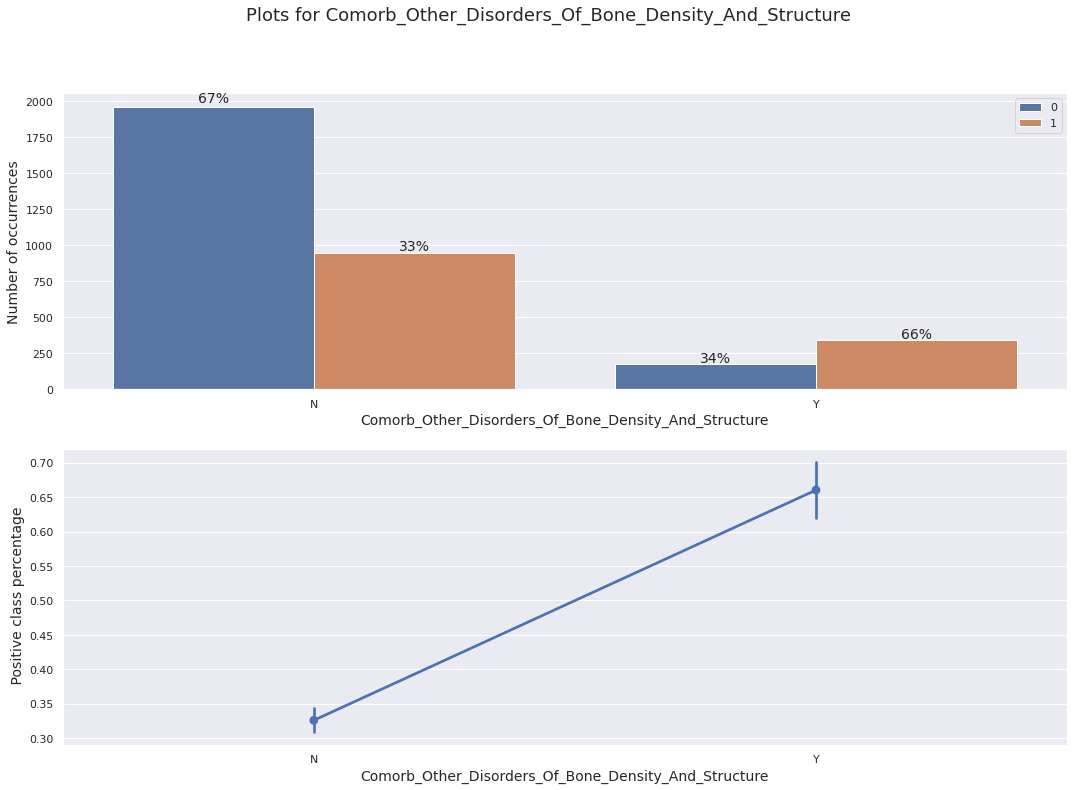

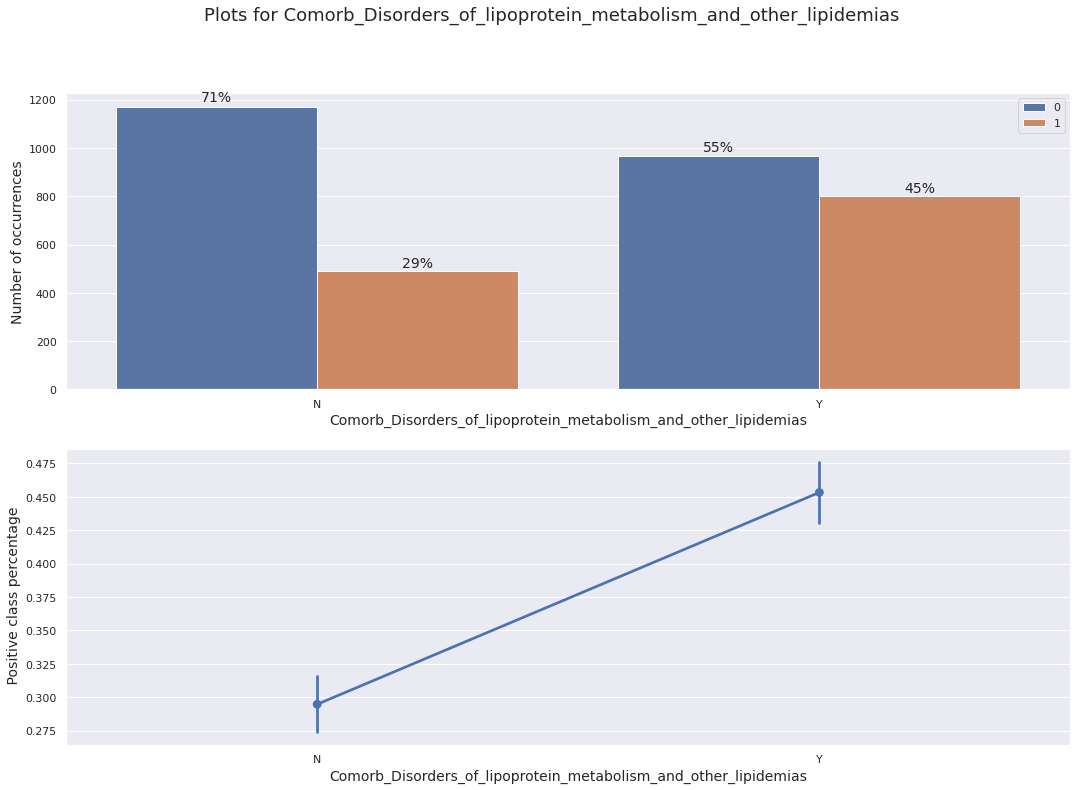

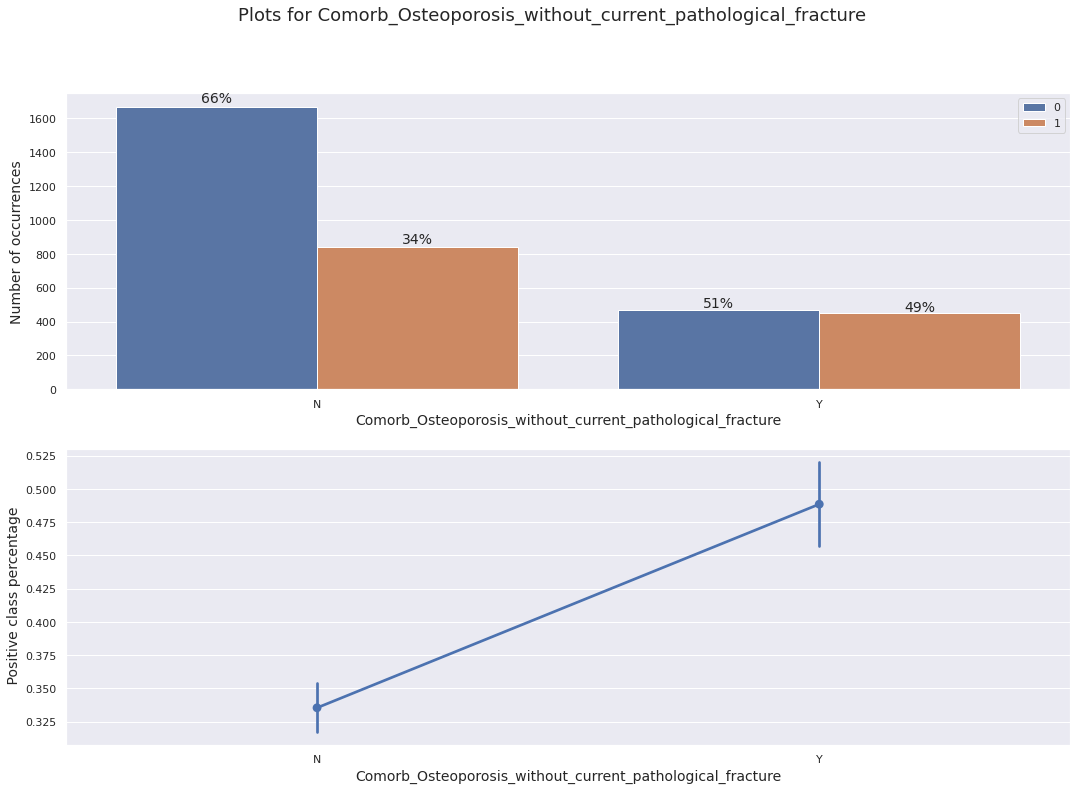

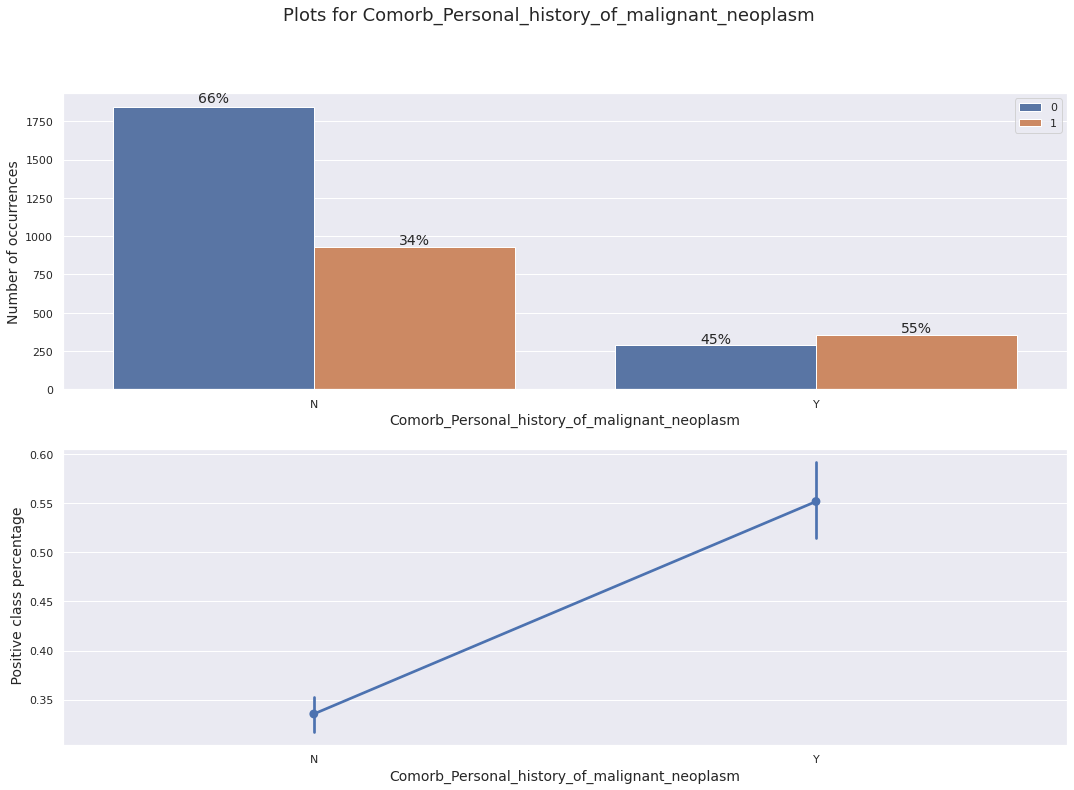

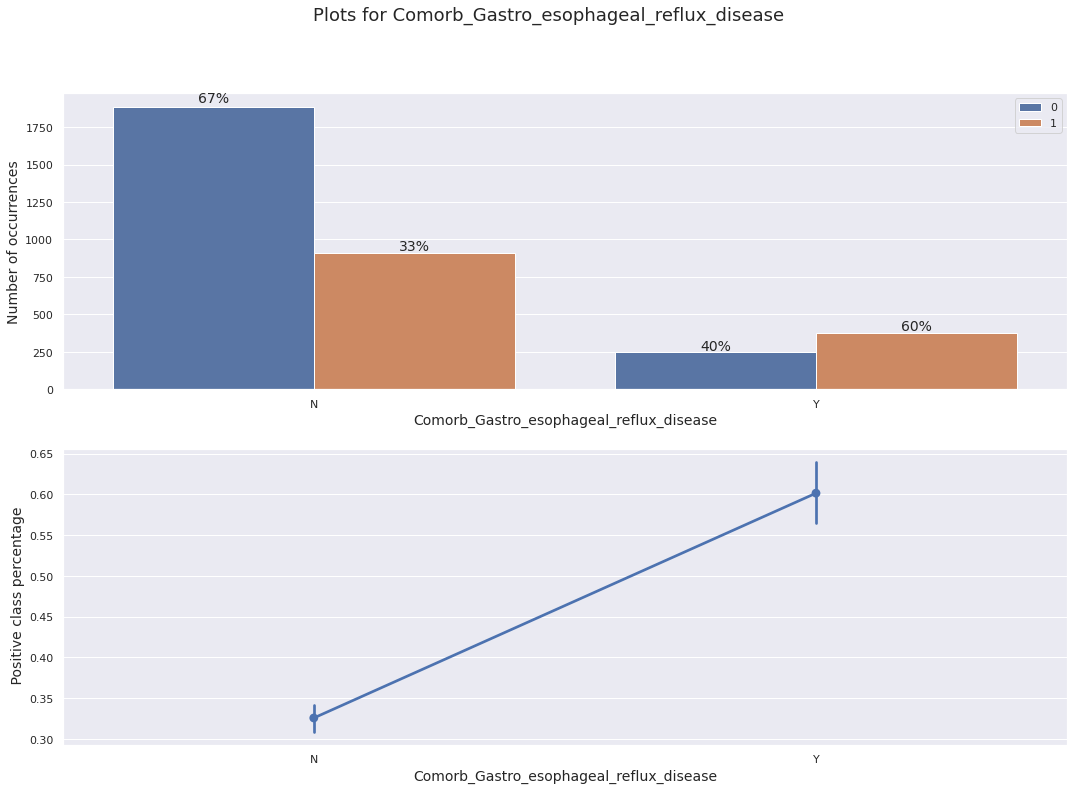

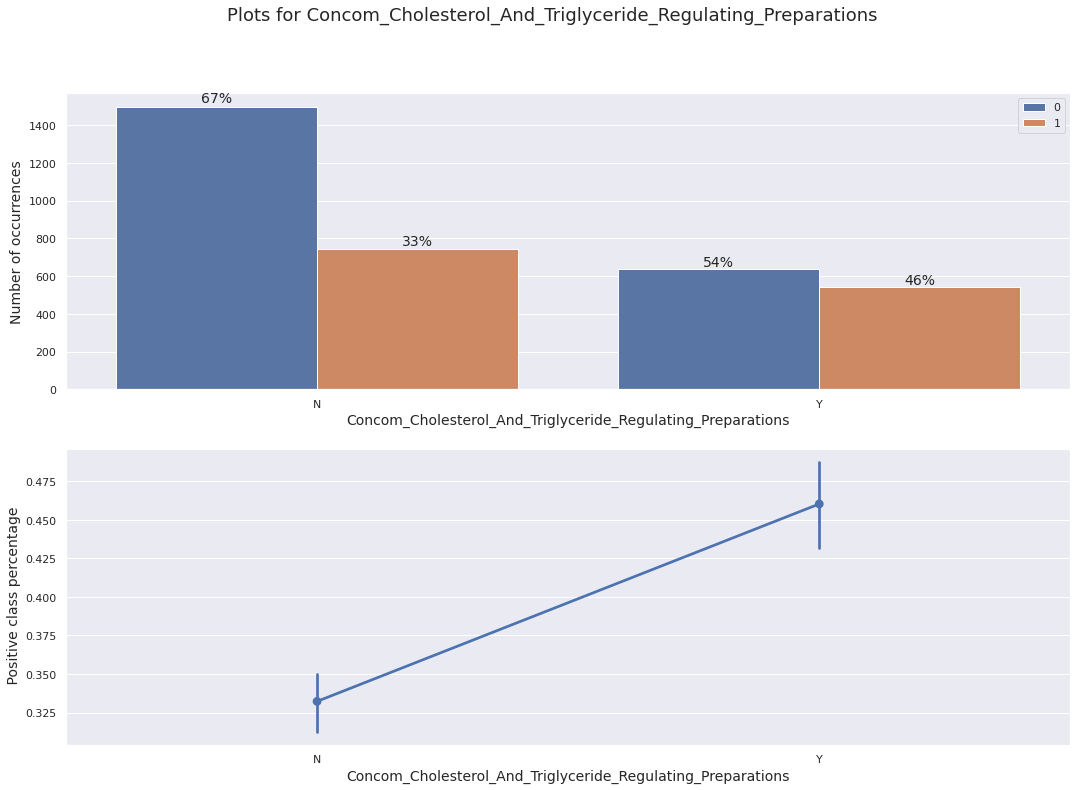

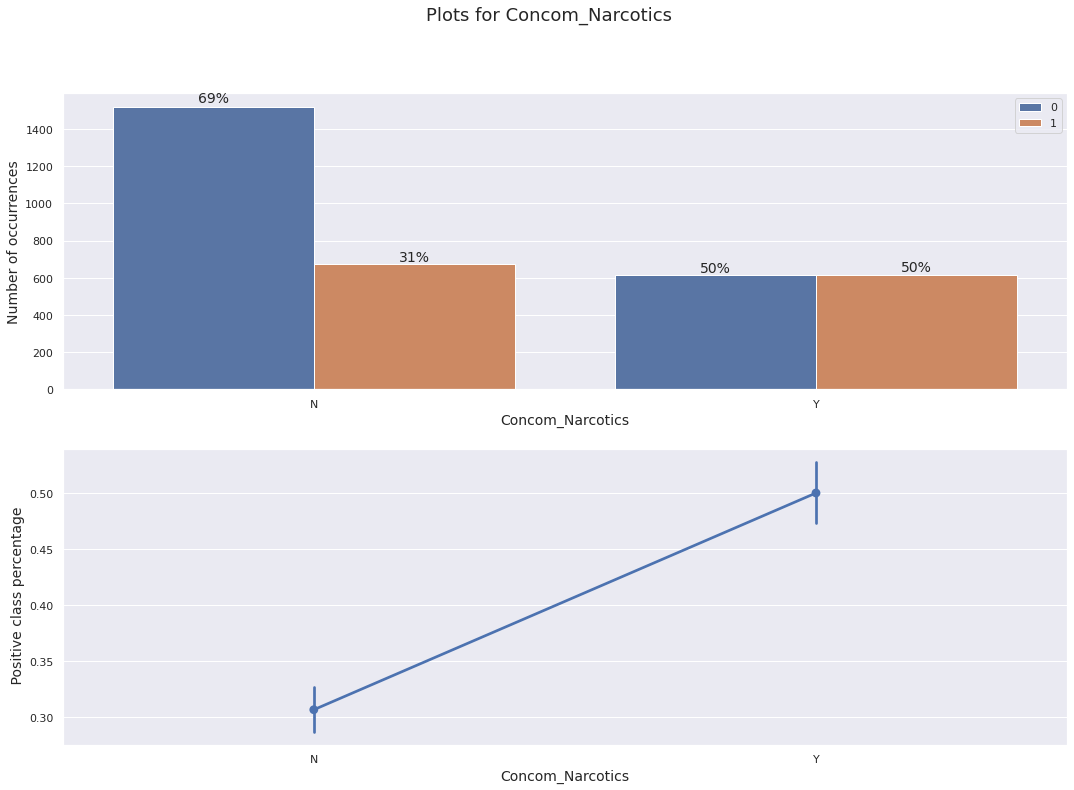

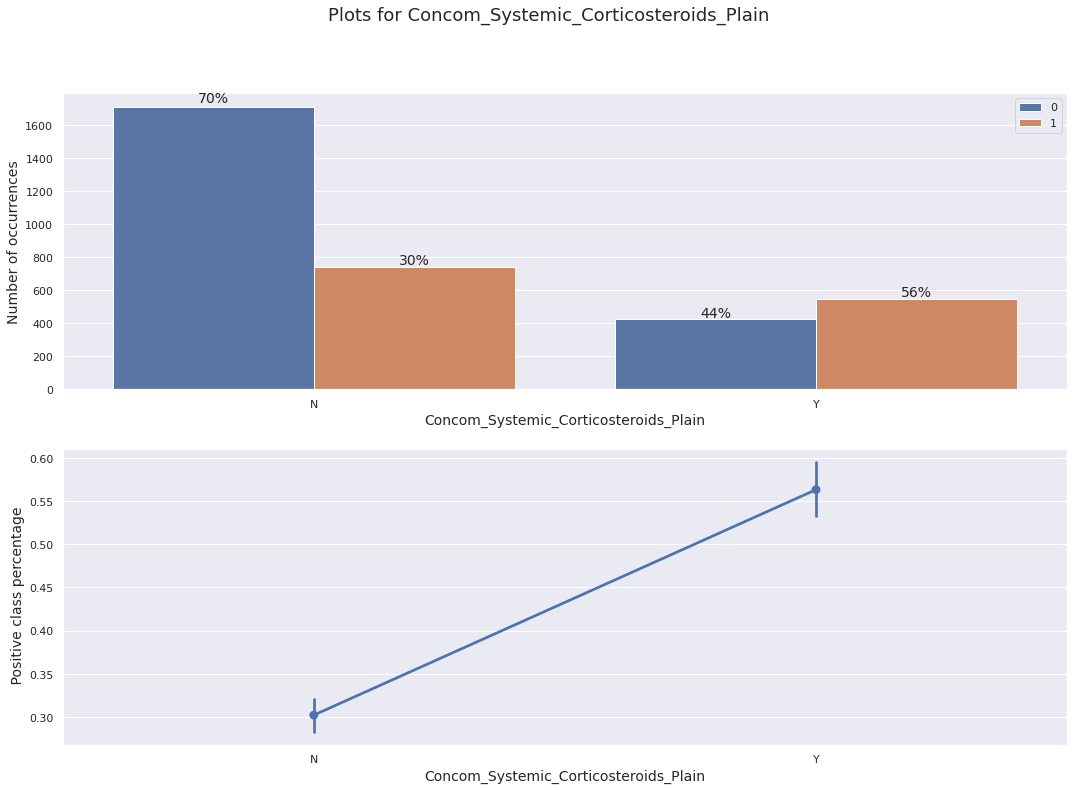

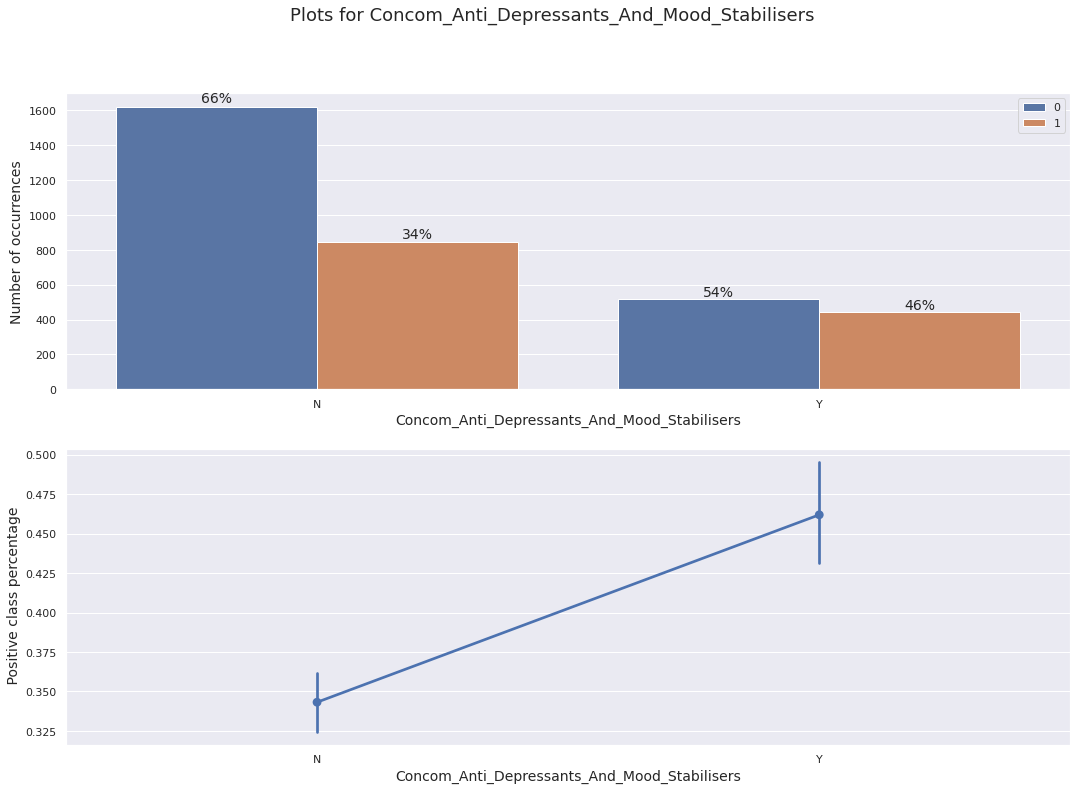

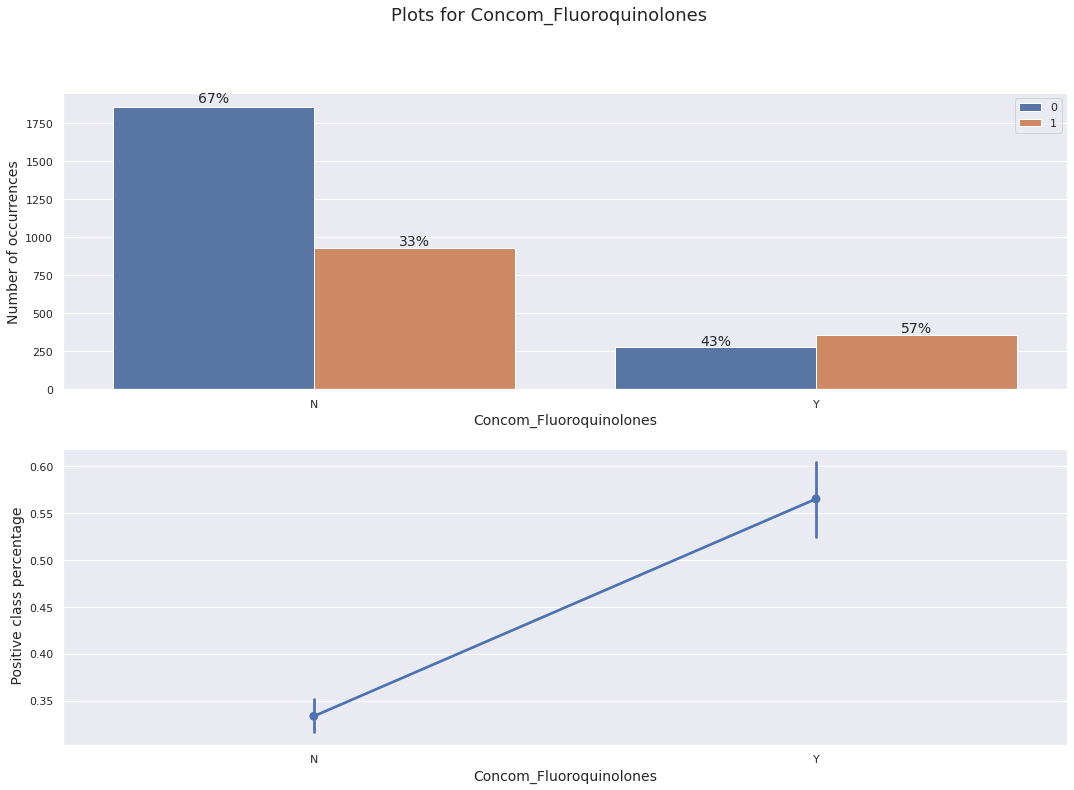

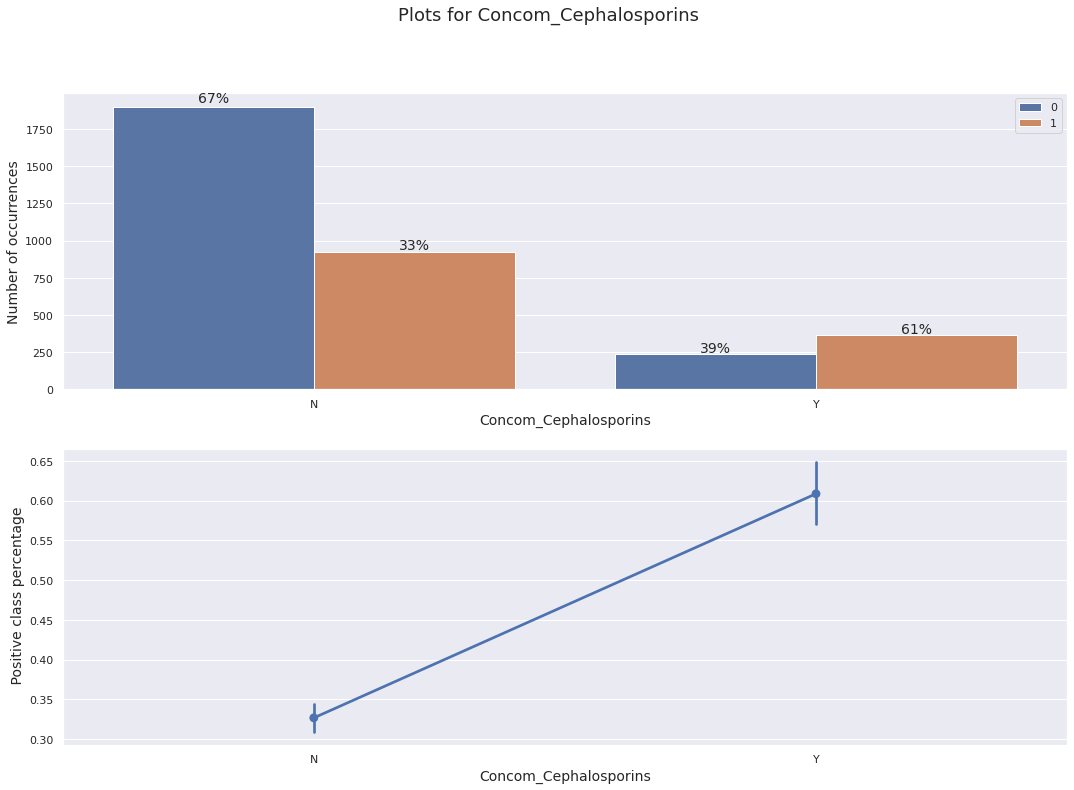

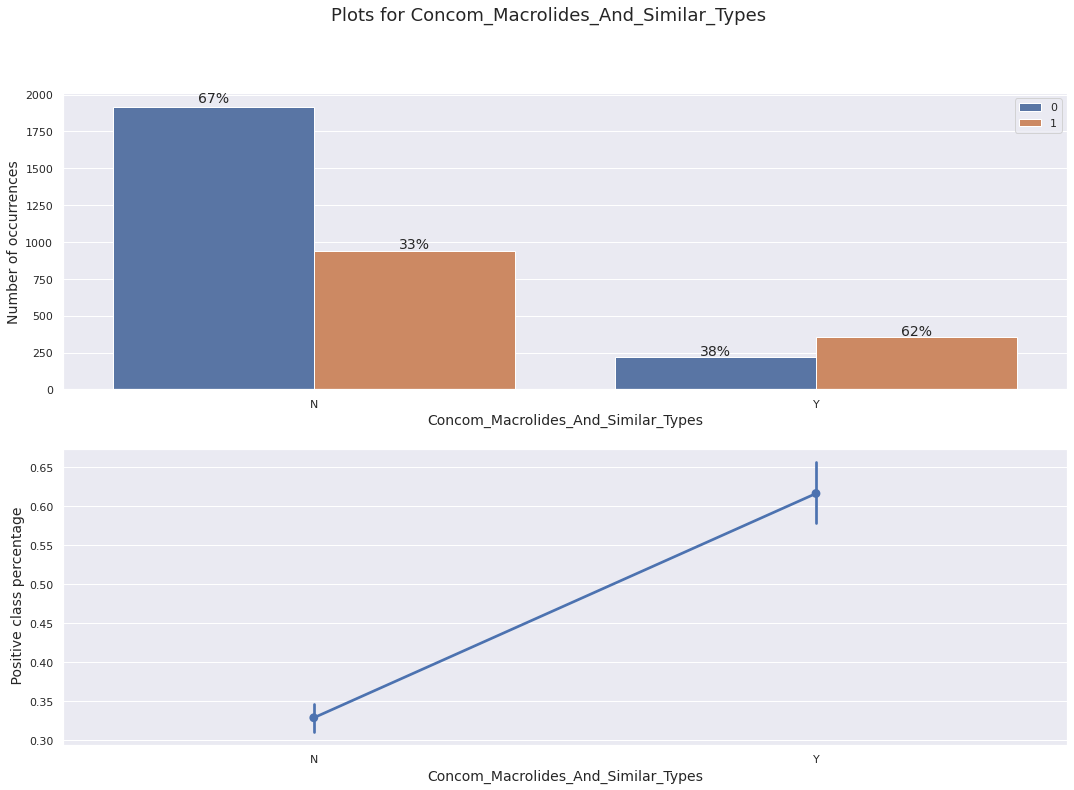

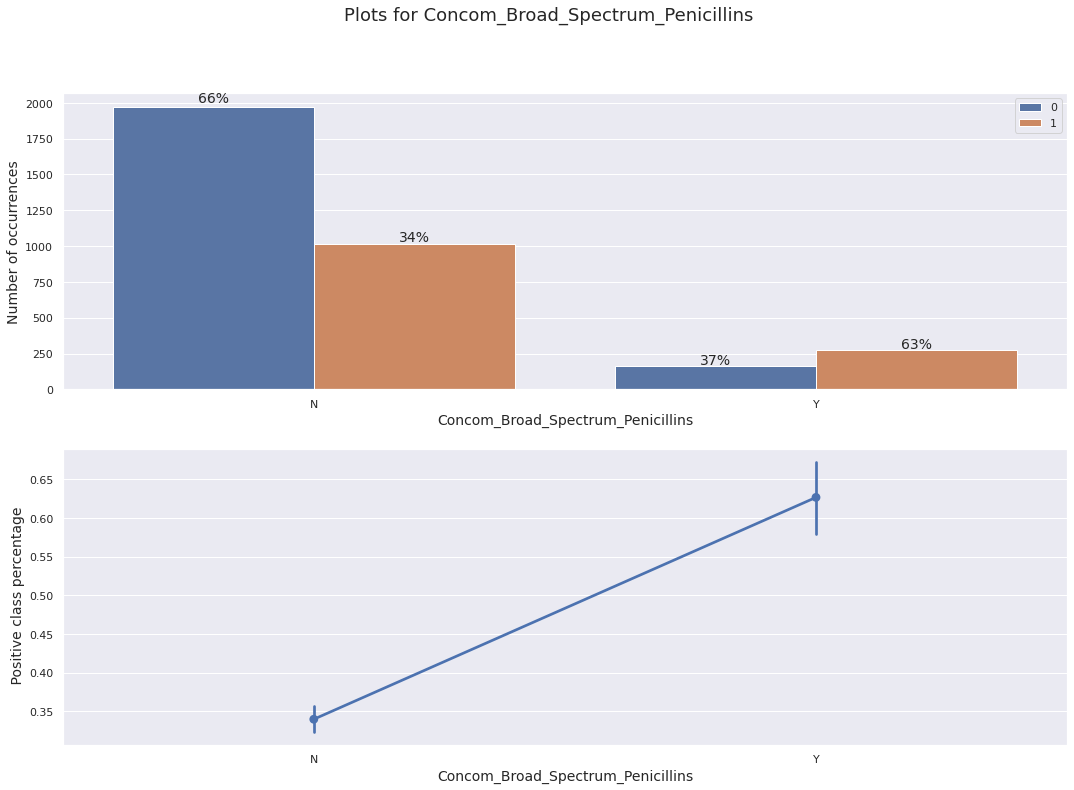

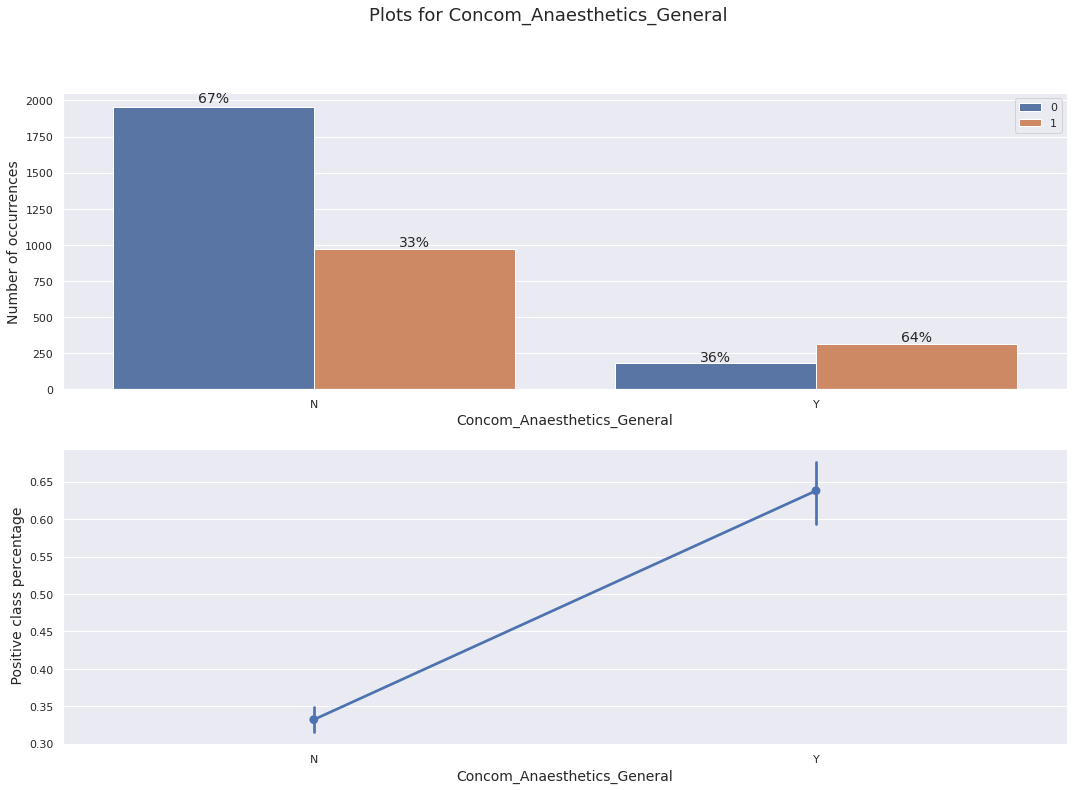

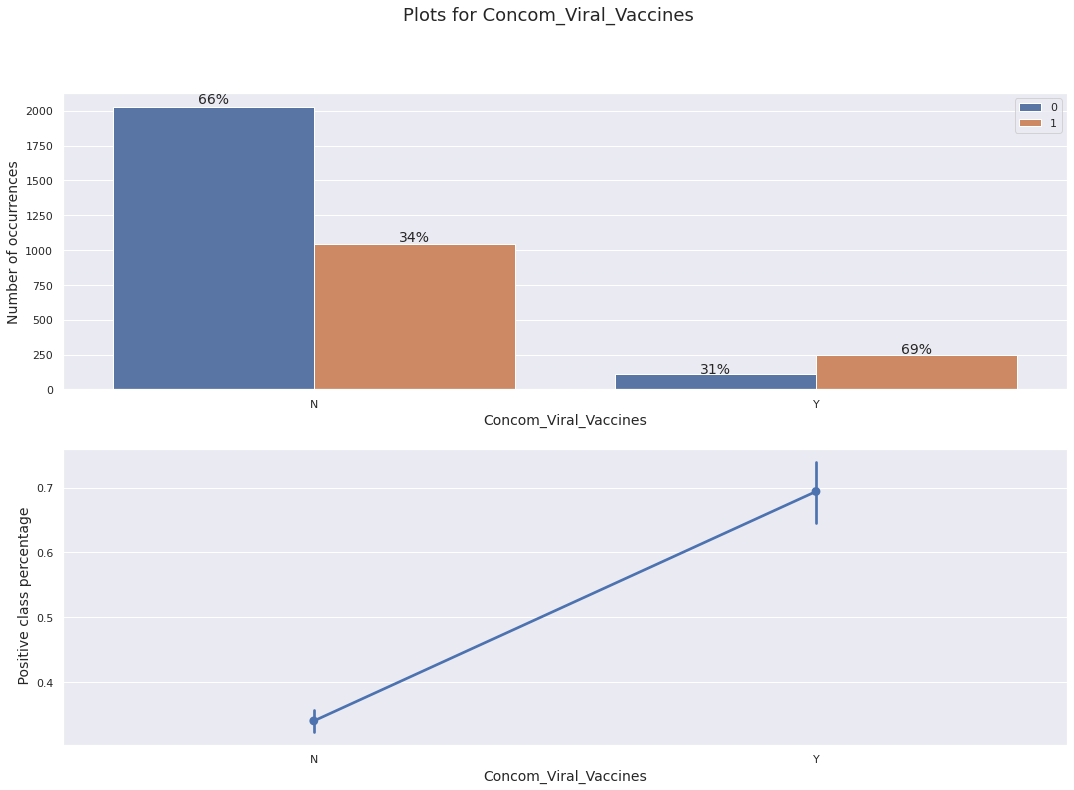

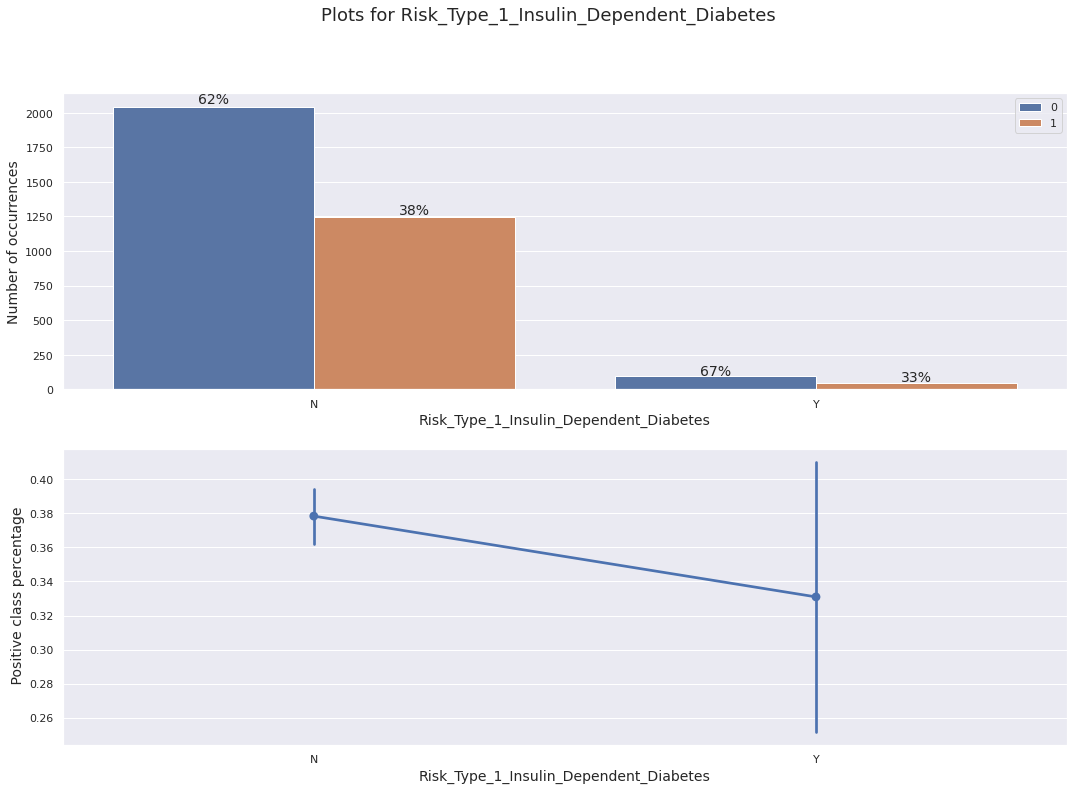

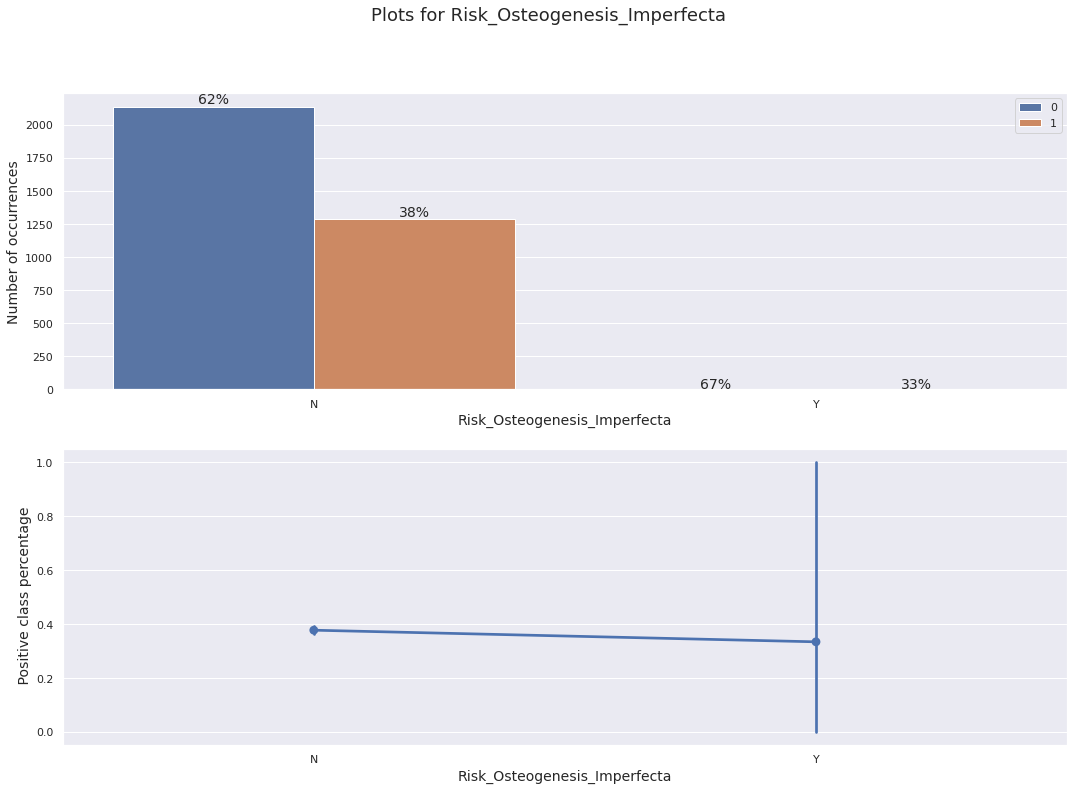

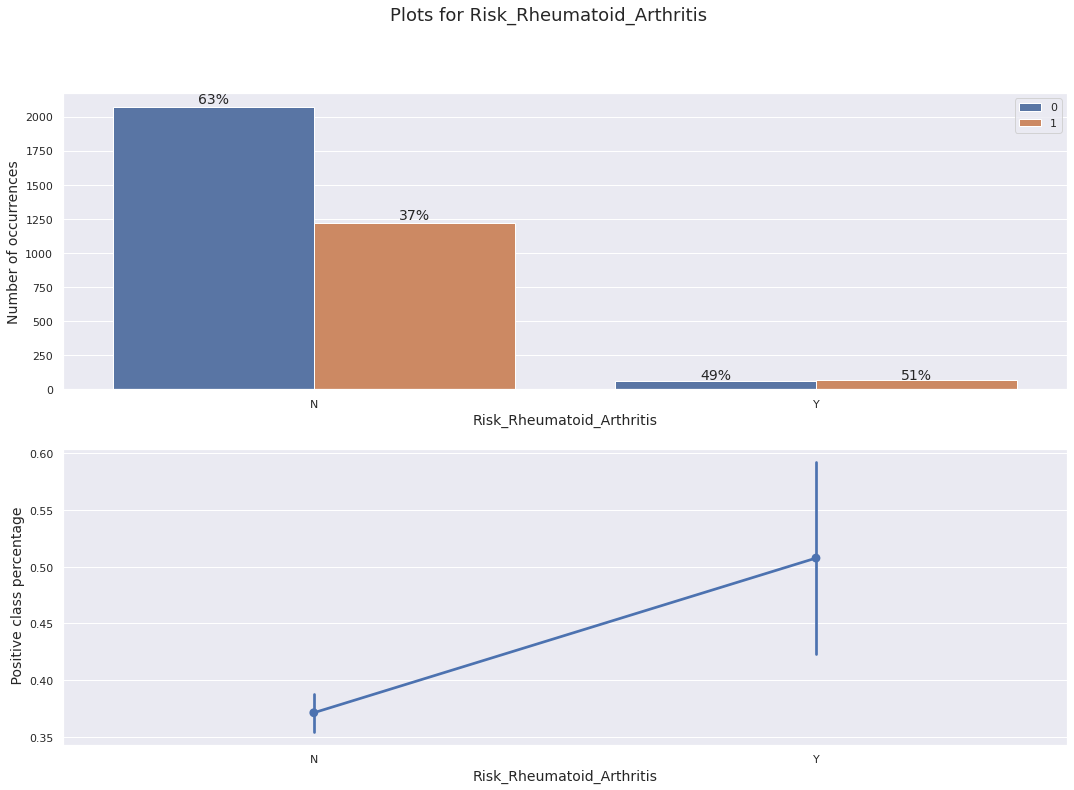

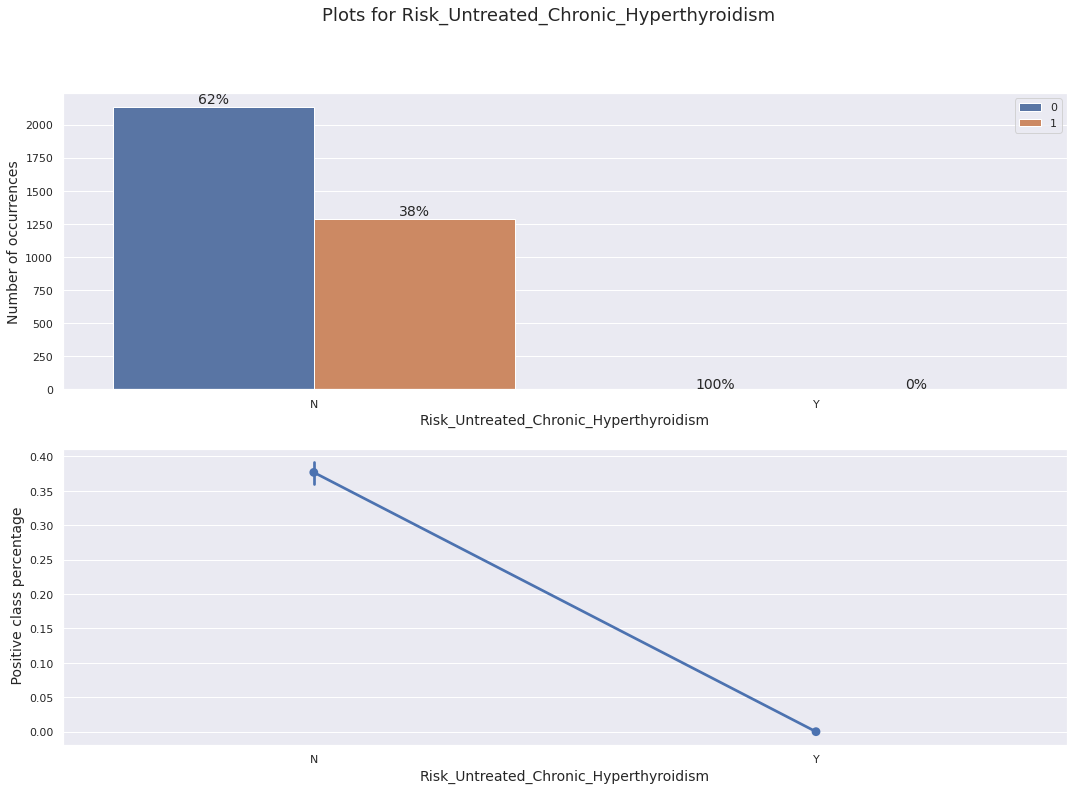

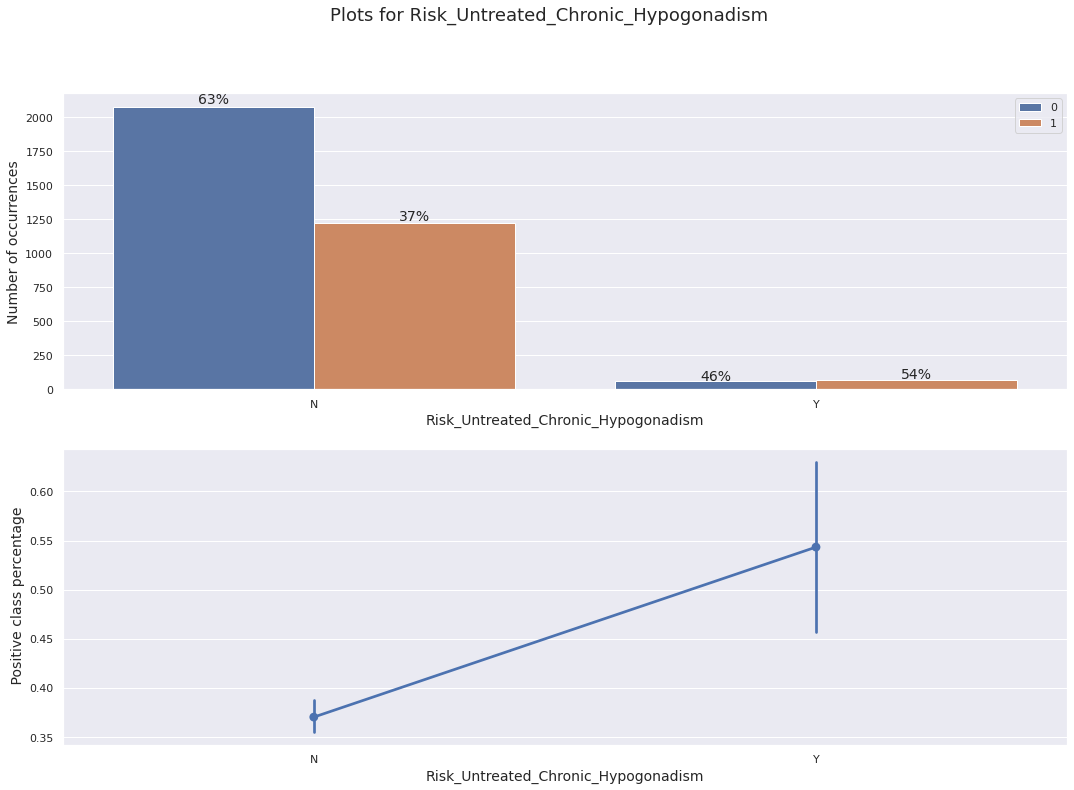

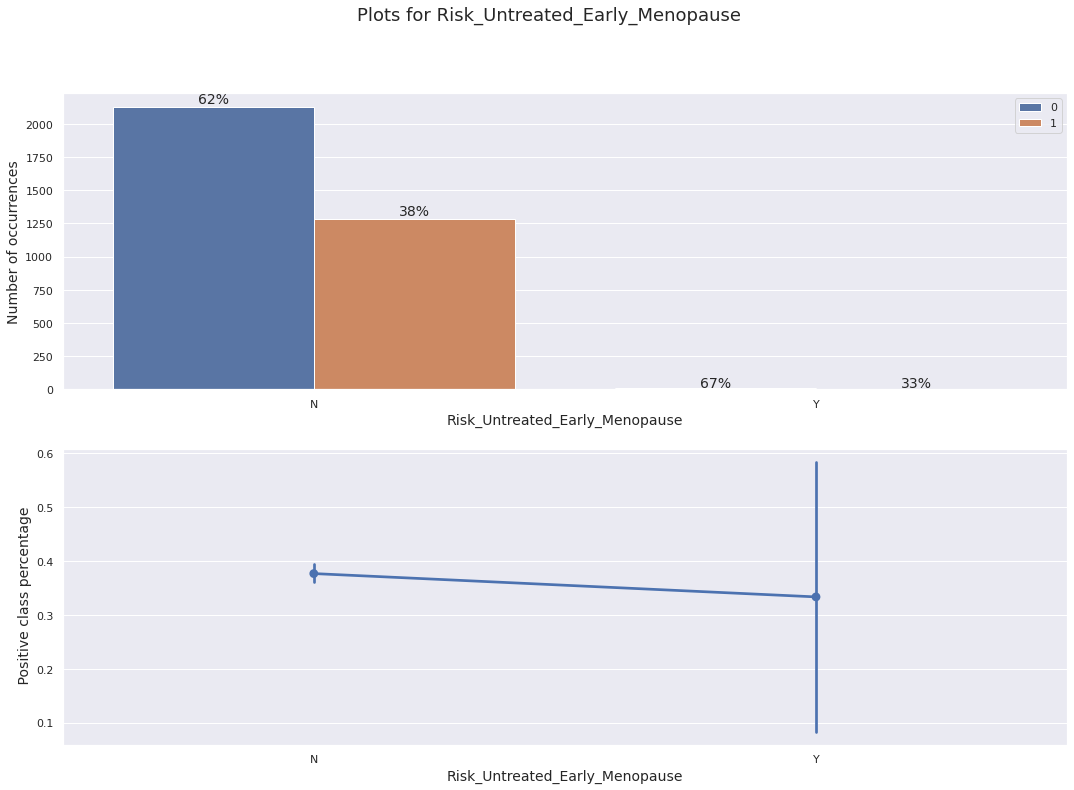

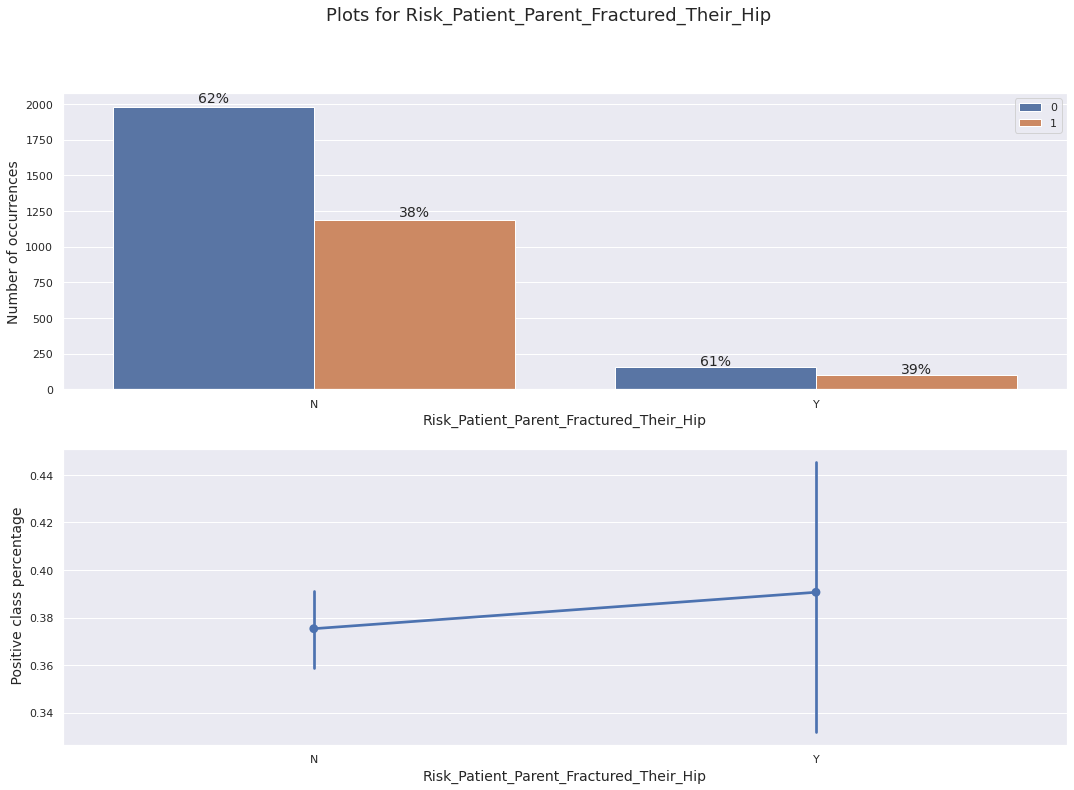

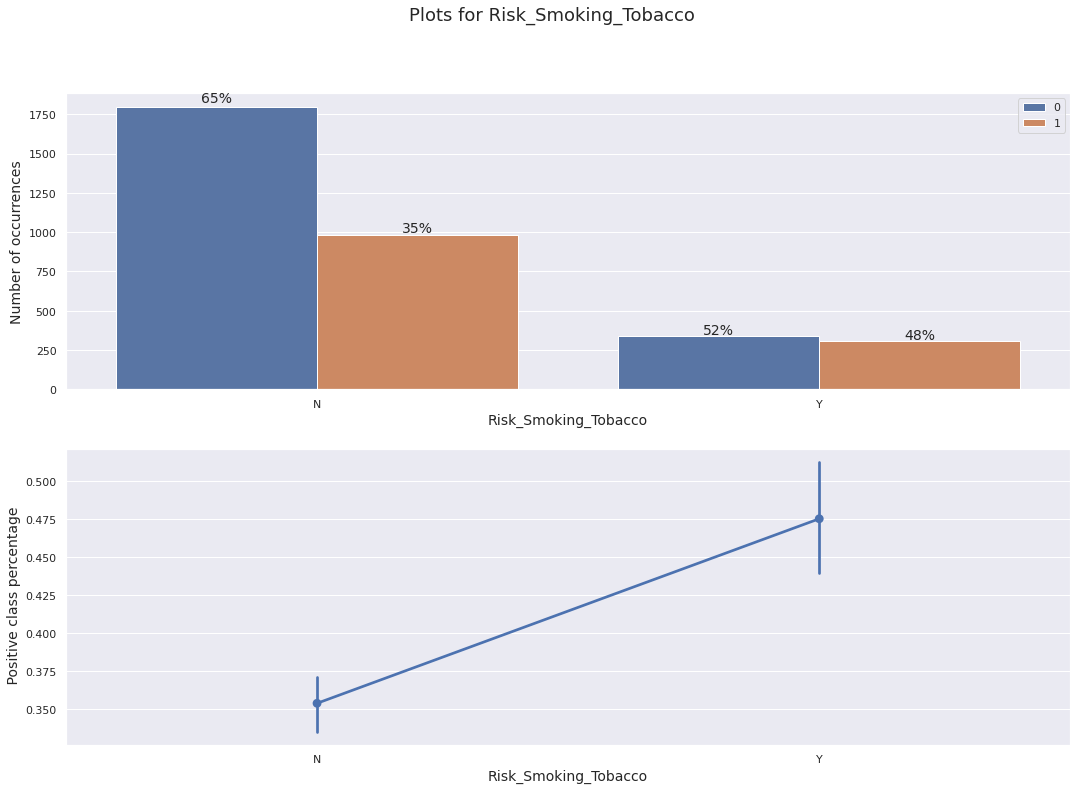

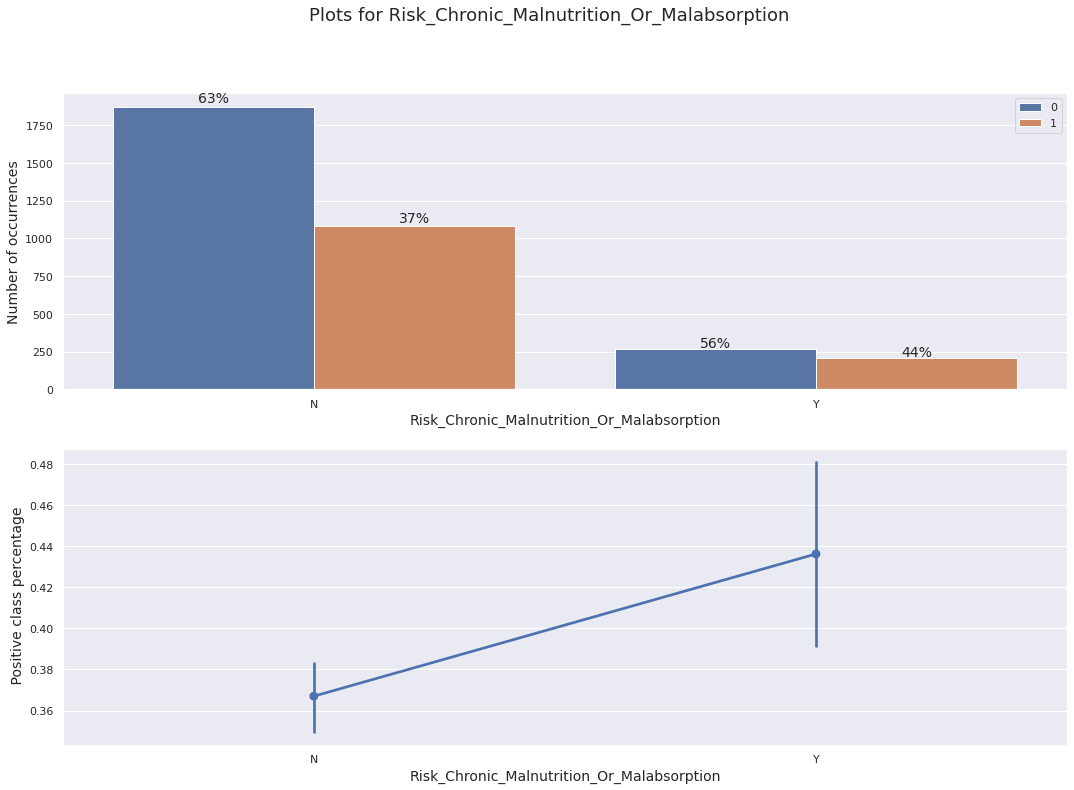

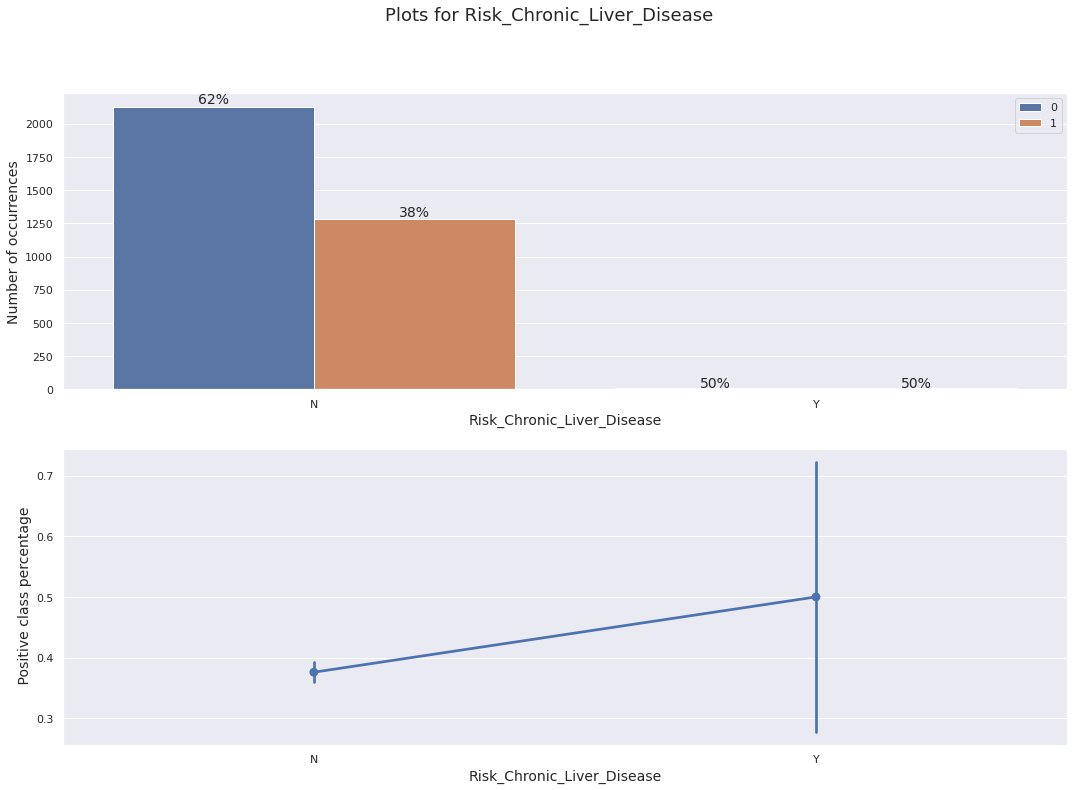

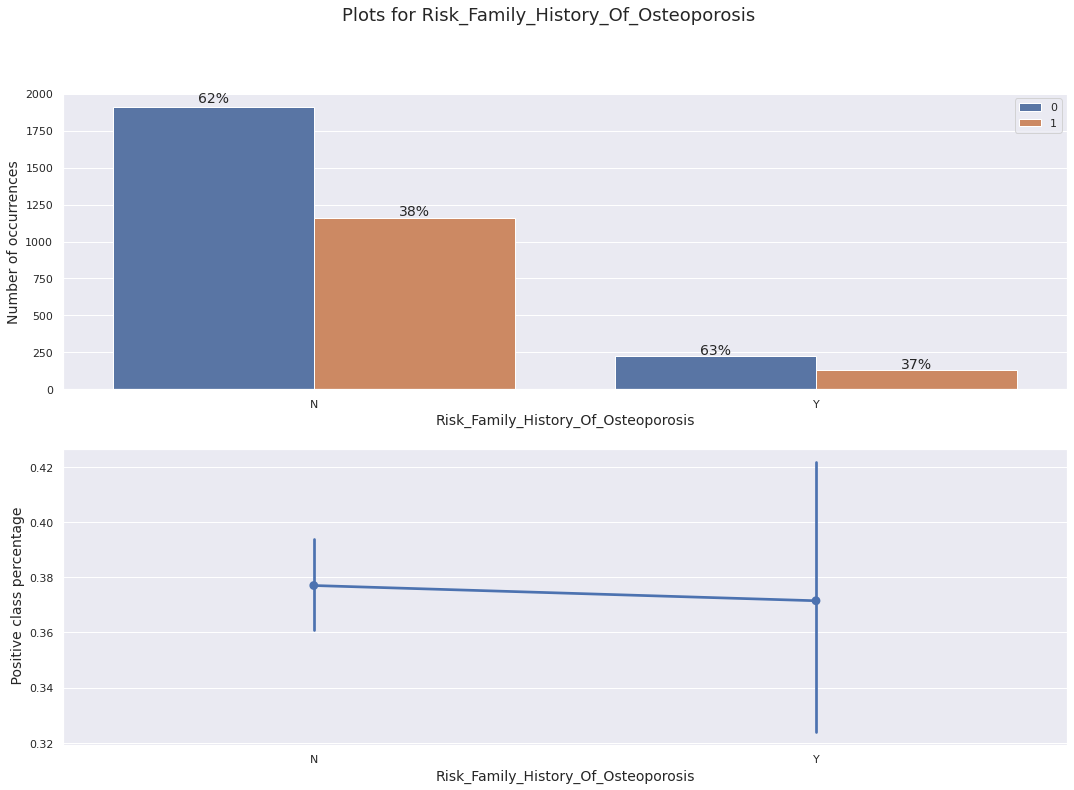

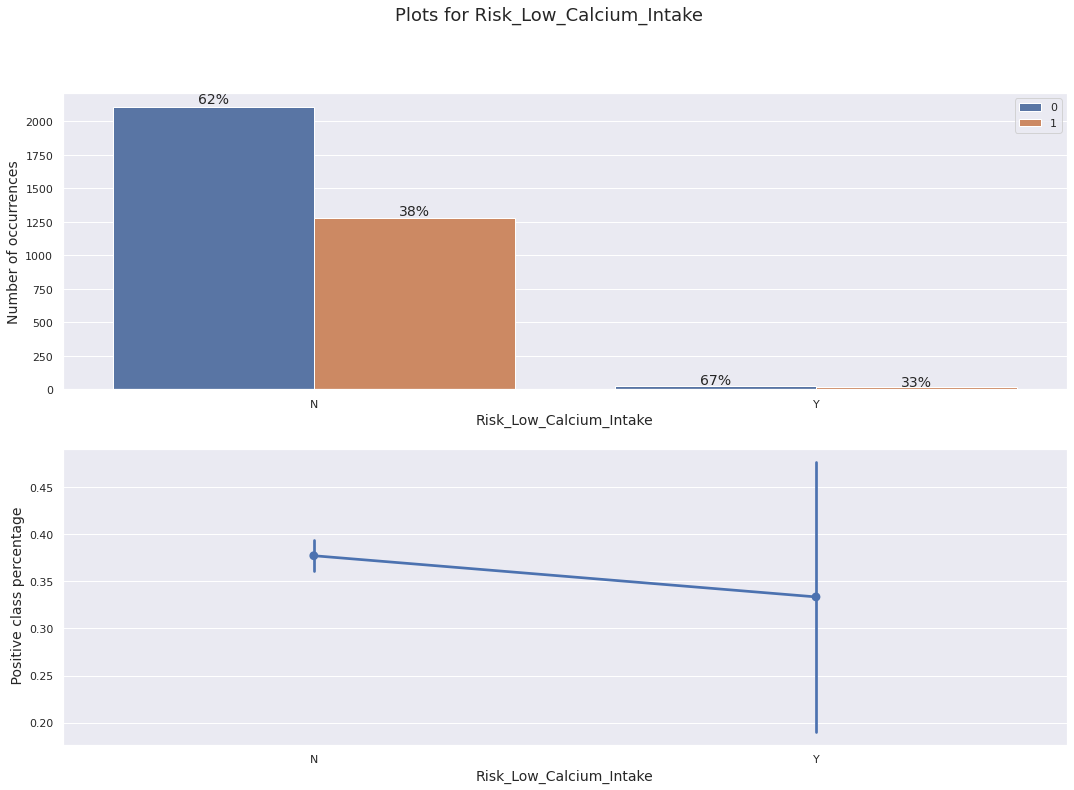

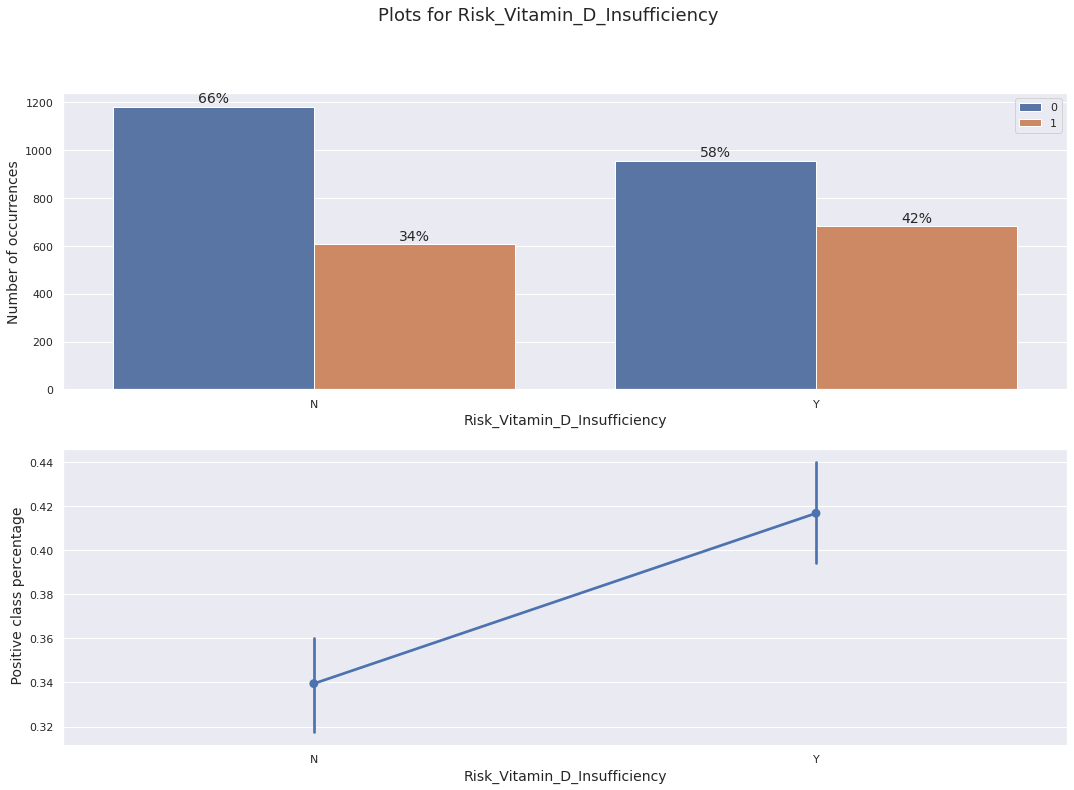

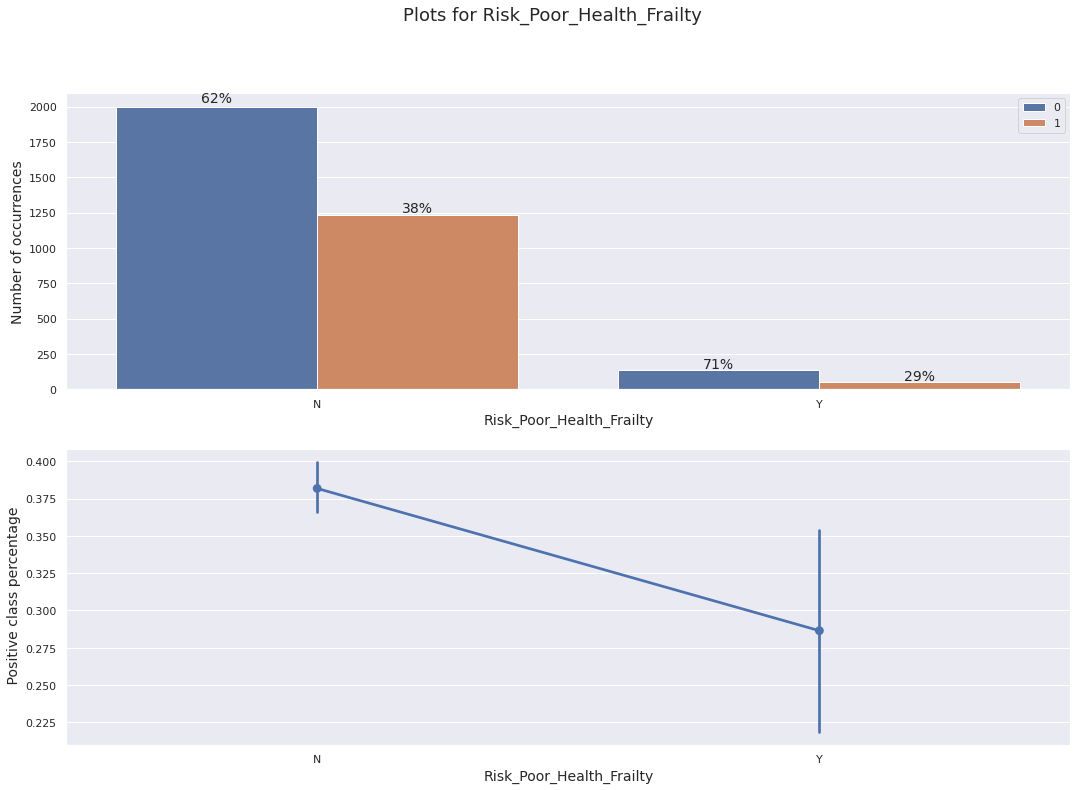

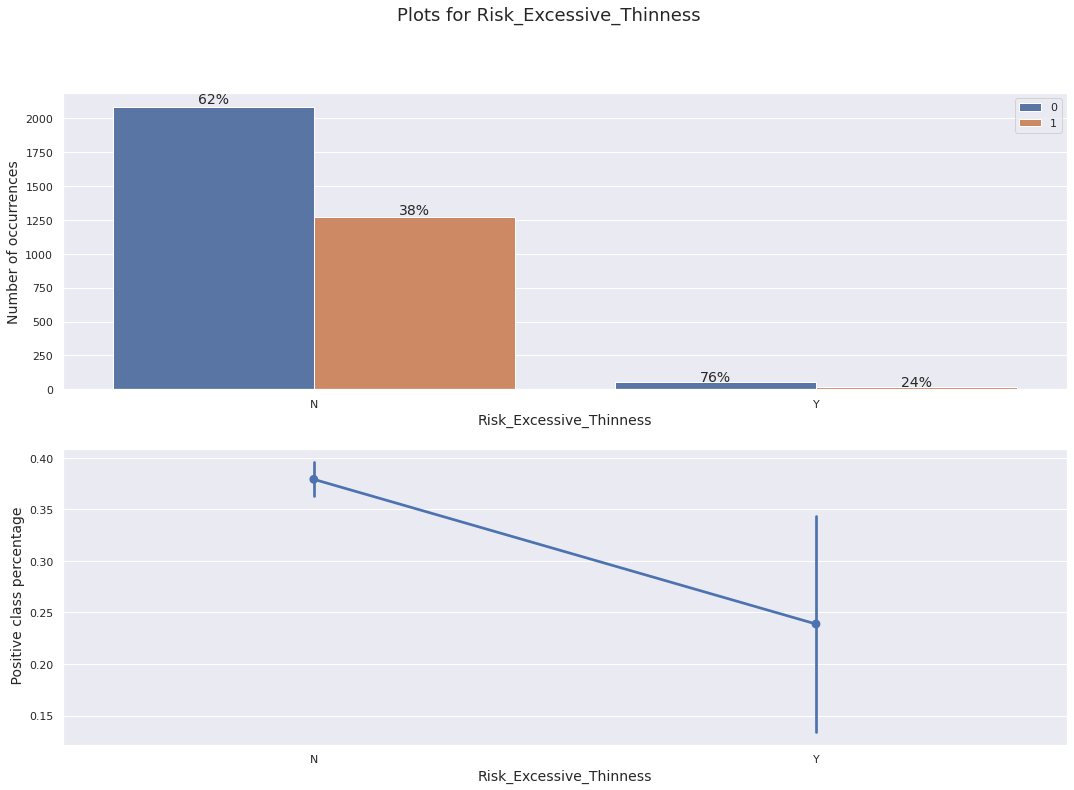

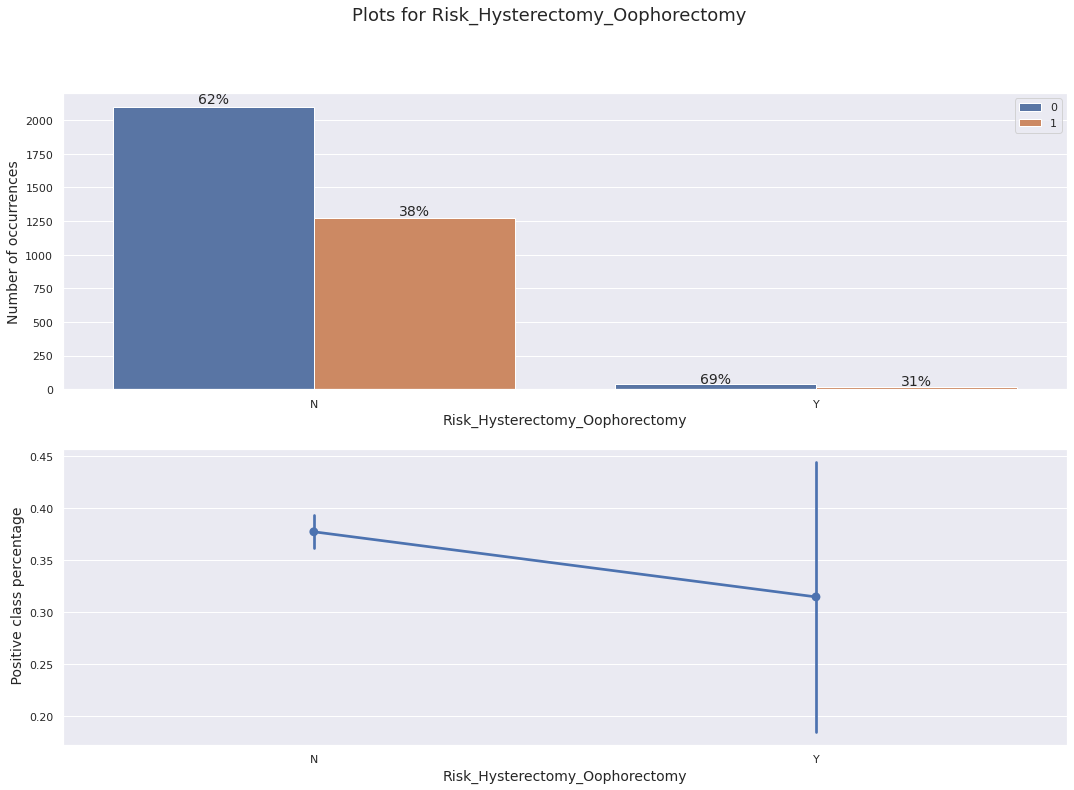

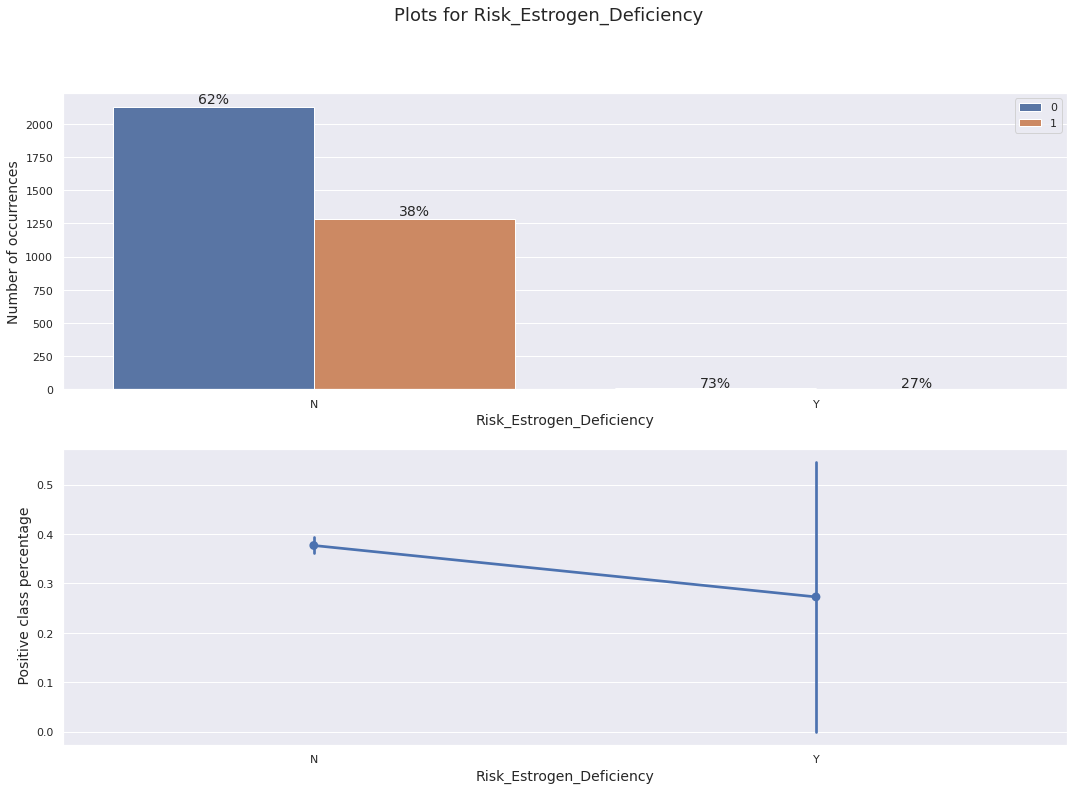

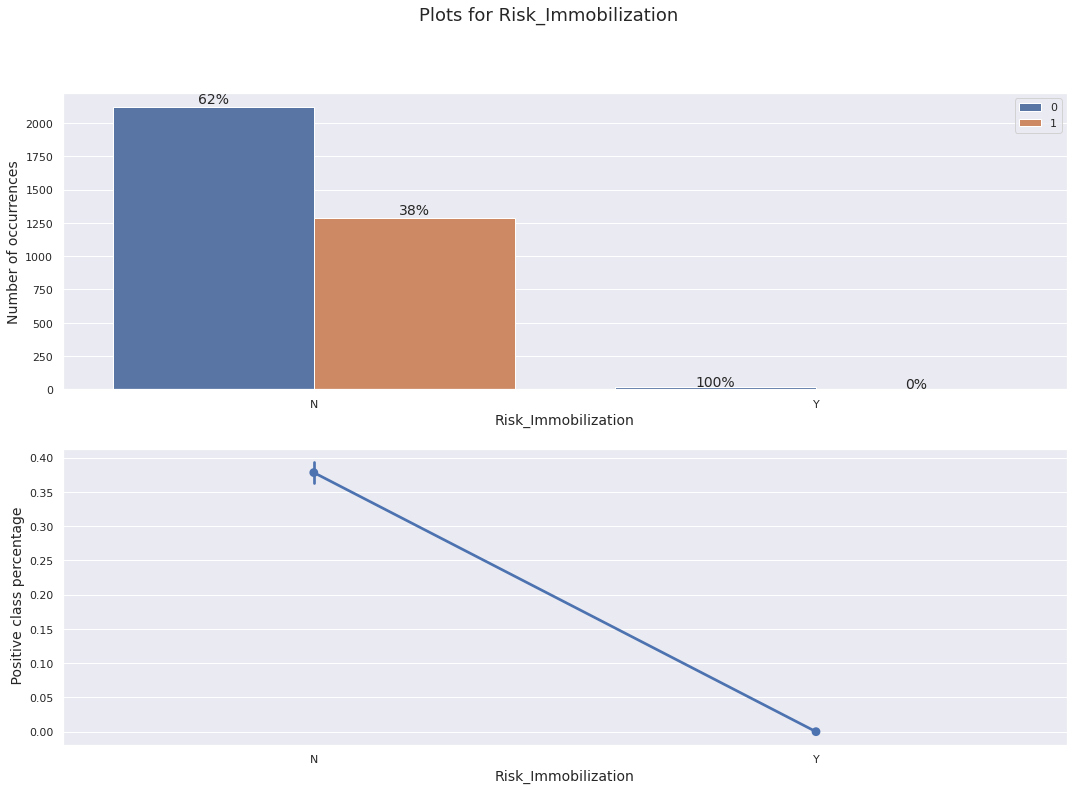

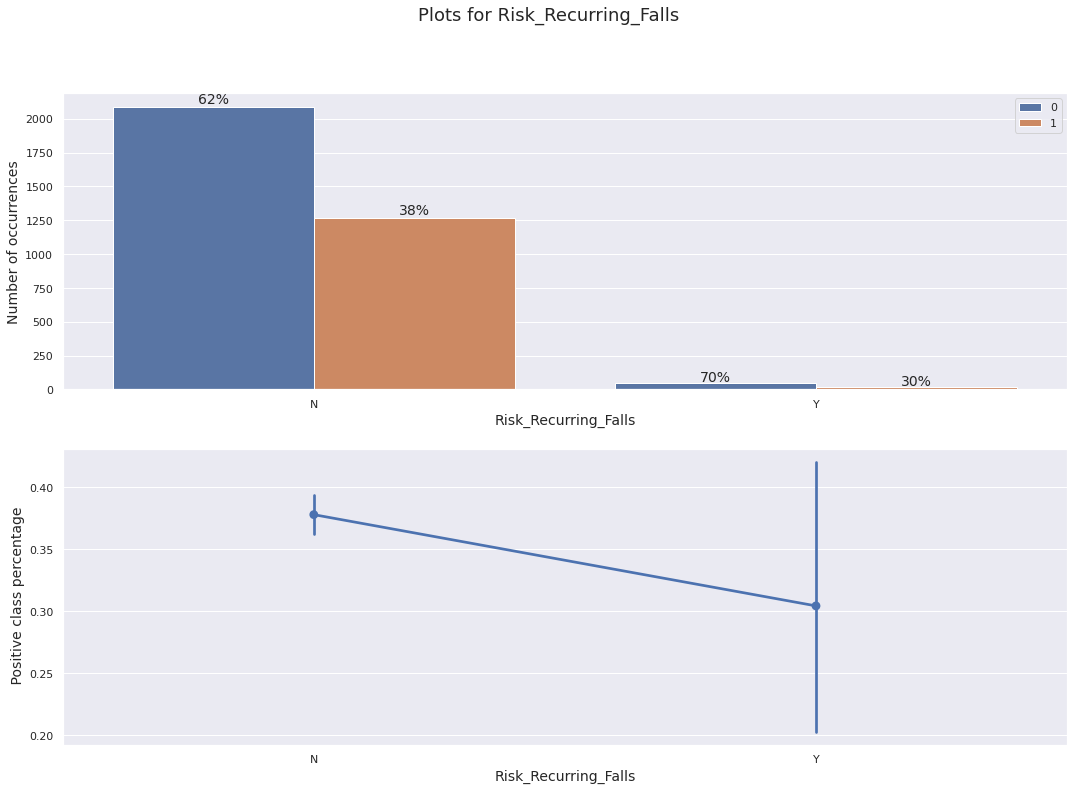

In [ ]:
##### Plotting nominal Categorical Features    

plot_categ(df,"y", categorical_features)

In [ ]:
class CustomEncoder():
    def __init__(self, cat_feats, features):

        self.cat_feats = cat_feats
        self.features = features
        self.updated_feature_list = None
        self.encoder = None
  
    def fit(self, data):
        '''f
        Fits data to one hot encoding object

        Parameters
        ----------
        data : dataframe
            data to be one hot encoded

        Returns
        -------
        encoder : class
            one hot encoder object
        updated_feature_list : list
            updated feature list with one hot encoded features
        '''
          
        self.encoder = OneHotEncoder(handle_unknown='ignore')
        self.encoder.fit(data[self.cat_feats].astype(str))
        self.updated_feature_list = [i for i in self.features if i not in self.cat_feats]
        self.updated_feature_list = self.updated_feature_list + list(self.encoder.get_feature_names(self.cat_feats))
        
        #joblib.dump(self.encoder , "ohe_obj_{}.pkl".format(run_id)) 
        return self.encoder, self.updated_feature_list
       
    def transform(self, data):
        '''
        Adds one hot encoding columns to data

        Parameters
        ----------
        data : dataframe
            data for one hot encoding

        Returns
        -------
        data : dataframe
            data with one hot encoding columns
        '''
      
        ohe_data = pd.DataFrame(self.encoder.transform(data[self.cat_feats].astype(str)).toarray(), index=data.index)
        ohe_data.columns = self.encoder.get_feature_names(self.cat_feats)
        data = data.drop(self.cat_feats,axis = 1)
        data = pd.concat([data, ohe_data] , axis = 1)
        return data

In [ ]:
def evaluate(y_train, pred_train, y_test, pred_test, threshold):
    pred_test_prob = pred_test
    
    pred_train = [1 if value >=threshold else 0 for value in pred_train ]
    pred_test = [1 if value >=threshold else 0 for value in pred_test]
    print("Train Accuracy:",accuracy_score(y_train, pred_train))
    print("Test Accuracy:",accuracy_score(y_test, pred_test))
    print('\n')
    
    matrix = confusion_matrix(y_train, pred_train)
    print('Confusion matrix : \n',matrix)
    print('\n')
    
    matrix = classification_report(y_train, pred_train)
    print('Train Classification report : \n',matrix)
    print('\n')
    
    matrix = confusion_matrix(y_test, pred_test)
    print('Confusion matrix : \n',matrix)
    print('\n')
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
    print( "tn, fp, fn, tp",  tn, fp, fn, tp)
    
    matrix = classification_report(y_test, pred_test)
    print('Test Classification report : \n',matrix)
    
    
    matrix = average_precision_score(y_test, pred_test_prob)
    print('Test AUPRC: \n',matrix)

    matrix = roc_auc_score(y_test, pred_test_prob)
    print('Test ROC_AUC: \n',matrix)
    
    

In [ ]:
def run_RF(gridsearch_rb, data, y ,threshold, n_folds = 5, seed = 1):
    print('Train RF')
    train, test = train_test_split(data,stratify= data[y], test_size=0.20, random_state=seed)
    print('training, test count: ',len(train), len(test))
    
    x_train,y_train = train.drop([y],1), train[y]
    x_test,y_test   = test.drop([y],1), test[y]

    forest = RandomForestClassifier(n_jobs=-1,random_state=seed, class_weight='balanced')
    forest.fit(x_train,y_train)
    
    print('Selecting best params using grid search')
    grid_search_forest = GridSearchCV(forest, gridsearch_rb, cv=n_folds, scoring='f1_micro',n_jobs = -1)
    grid_search_forest.fit(x_train, y_train)
    
    params = grid_search_forest.best_params_
    print(params)
    
    best_model = RandomForestClassifier(**params,n_jobs=-1,random_state=seed, class_weight='balanced')
    best_model.fit(x_train,y_train)
    
#     joblib.dump(best_model, "RF_model_{}.pkl".format(run_id)) 
#     print("Model Saved, Model ID: ",run_id)
    
    print("Prediction of training and test data")
    pred_train = best_model.predict_proba(x_train)[:, 1]
    pred_test  = best_model.predict_proba(x_test)[:, 1]
#     fimp = pd.DataFrame(zip(best_model.feature_importances_,x_test.columns),columns = ['name','imp_score'])
    
    train['pred'] = pred_train
    test['pred'] = pred_test
    
    evaluate(y_train, pred_train, y_test, pred_test, threshold)
    
    explainer = shap.TreeExplainer(best_model) 
    shap_values = explainer.shap_values(x_test, approximate=False, check_additivity=False)

    shap.summary_plot(shap_values[1], x_test, plot_size=[16,12])
    
    #train= train[['SOURCE_EID_x','SOURCE_EID_y','y','pred']]
    #test= test[['SOURCE_EID_x','SOURCE_EID_y','y','pred']]
    return train, test

In [ ]:
def run_XGB(gridsearch_xgb, data, y, threshold, n_folds = 5, seed = 1):
    print('Train XGB')
    train, test = train_test_split(data,stratify= data[y], test_size=0.20, random_state=seed)
    print('training, test count: ',len(train), len(test))
    
    x_train,y_train = train.drop(y,1), train[y]
    x_test,y_test   = test.drop(y,1), test[y]
    
    dtrain = xgb.DMatrix(x_train, label=y_train, nthread=-1)
    dtest = xgb.DMatrix(x_test, label=y_test, nthread=-1)
    
    params = {}
    min_aucpr = float("-Inf")
    best_params = None
    
    print('Selecting best params using grid search')
    
    for max_depth, min_child_weight, subsample, colsample_bytree in gridsearch_xgb:

        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        
        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=500,
            seed=seed,
            nfold=k_fold,
            metrics={'aucpr'},
            early_stopping_rounds=10,
            stratified=True
        )
        
        # Update best aucpr
        mean_aucpr = cv_results['test-aucpr-mean'].mean()
        
        if mean_aucpr > min_aucpr:
            min_aucpr = mean_aucpr
            best_params = (max_depth,min_child_weight, subsample, colsample_bytree)
            
    print("Best params-> max_depth, min_child_weight, subsample, colsample_bytree:{} with aucpr:{}".format(best_params, min_aucpr))   
    params = {
                 'eta'             : 0.01,
                 'objective'       :'binary:logistic',
                 'eval_metric'     :'aucpr',
                 'max_depth'       : best_params[0],
                 'min_child_weight': best_params[1],
                 'subsample'       : best_params[2],
                 'colsample_bytree': best_params[3]
              }
    
    model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10,
    verbose_eval=False)
    
    num_boost_round = model.best_iteration + 1
    
    print("Model tuning with best params")
    best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    verbose_eval=False)
    
#     joblib.dump(best_model, "XGB_model_{}.pkl".format(run_id)) 
#     print("Model Saved, Model ID: ",run_id)
    
    pred_train = best_model.predict(dtrain)
    pred_test  = best_model.predict(dtest)
    
    print("Model performace")
    evaluate(y_train, pred_train, y_test, pred_test, threshold)
    
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, x_test, plot_size=[16,12])

    return pred_train, pred_test

In [ ]:
pipeline_type     = 'TRAIN'
y                 = 'y'
seed              = 1
k_fold            = 5
threshold         = 0.5

gridsearch_rb = { 
 'max_depth': [5,6,7],
 'min_samples_split' : [5,7,9],
 'min_samples_leaf' : [2,4,6] 
}


#### Model 1 --- without all the variables

In [ ]:
#missing_data
#missing_data

# importing copy module
import copy
featurised_data= copy.deepcopy(df) 

In [ ]:
#featurised_data
#ordinal_cats=['Risk_Segment_During_Rx','Change_T_Score','Change_Risk_Segment','Age_Bucket']
#uniques = df[ordinal_cats].apply(lambda x: x.unique())


In [ ]:
# create object of Ordinalencoding
#!pip install category_encoders
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['Change_T_Score','Change_Risk_Segment','Risk_Segment_During_Rx','Age_Bucket'],
                           return_df=True,
                           mapping=[{'col':'Change_T_Score',
                                     'mapping':{'Worsened':-1,'Unknown':0,'No change':1,'Improved':2}},
                                    {'col':'Change_Risk_Segment',
                                     'mapping':{'Worsened':-1,'Unknown':0,'No change':1,'Improved':2}},
                                    {'col':'Risk_Segment_During_Rx',
                                     'mapping':{'VLR_LR':-1,'Unknown':0,'HR_VHR':1}},
                                    {'col':'Age_Bucket',
                                     'mapping':{'>75':1,'55-65':2,'65-75':3,'<55':4}}
                                    
                                    ])

In [ ]:
featurised_data = encoder.fit_transform(featurised_data)

In [ ]:
#list for cols to scale
cols_to_scale = ['Dexa_Freq_During_Rx','Count_Of_Risks']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(featurised_data[cols_to_scale])

#scale selected data
featurised_data[cols_to_scale] = scaler.transform(featurised_data[cols_to_scale])

In [ ]:
#run_id = datetime.now(pytz.timezone('Asia/Calcutta')).strftime("%Y%m%d%H%M%S")
##print("run_id ->" , run_id)  
features = featurised_data.columns
one_hot_encoding_features = list(featurised_data.select_dtypes("object").columns)

if len(one_hot_encoding_features)>0:
    onehotencoder = CustomEncoder(one_hot_encoding_features,features)
    onehotencoder_obj, updated_feature_ls =  onehotencoder.fit(featurised_data)
    featurised_data = onehotencoder.transform(featurised_data)
else:
    onehotencoder_obj,updated_feature_ls ={},features

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Train RF
training, test count:  2739 685
Selecting best params using grid search
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 9}
Prediction of training and test data
Train Accuracy: 0.8492150419861263
Test Accuracy: 0.8145985401459854


Confusion matrix : 
 [[1503  205]
 [ 208  823]]


Train Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1708
           1       0.80      0.80      0.80      1031

    accuracy                           0.85      2739
   macro avg       0.84      0.84      0.84      2739
weighted avg       0.85      0.85      0.85      2739



Confusion matrix : 
 [[375  52]
 [ 75 183]]


tn, fp, fn, tp 375 52 75 183
Test Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       427
           1       0.78      0.71      0.74       258

    accuracy                           0.81       685
   macro avg

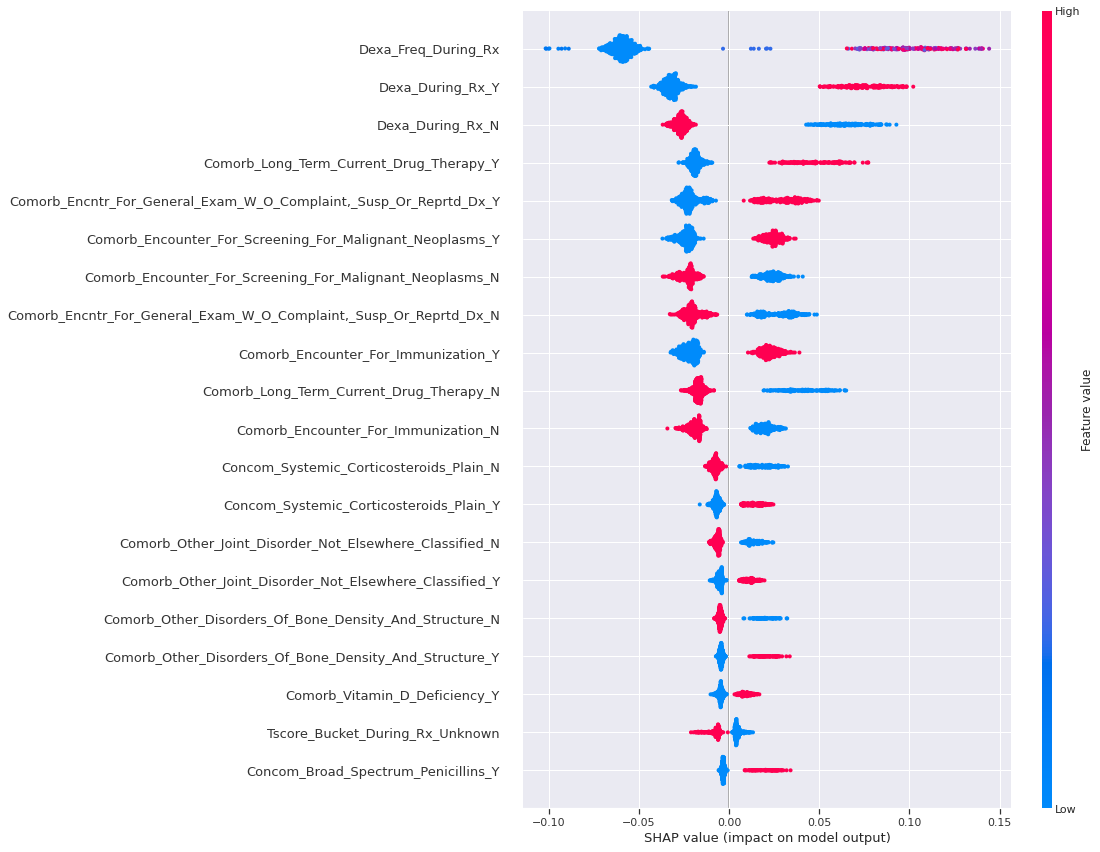

In [ ]:
train2, test2 = run_RF(gridsearch_rb, featurised_data, 'y', threshold, n_folds = k_fold, seed = seed)   

In [ ]:
gridsearch_xgb = { 
 'max_depth': [5],
 'min_child_weight' : [1],
 'subsample' : [.5],
 'colsample_bytree' : [.5]
}

In [ ]:
gridsearch_xgb = [
    (max_depth, min_child_weight,subsample,colsample_bytree)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
    for subsample in [0.5]
    for colsample_bytree in [0.5]
]

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
featurised_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in featurised_data.columns.values]

Train XGB
training, test count:  2739 685
Selecting best params using grid search


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Best params-> max_depth, min_child_weight, subsample, colsample_bytree:(11, 6, 0.5, 0.5) with aucpr:0.782645553846154
Model tuning with best params
Model performace
Train Accuracy: 0.8178167214311792
Test Accuracy: 0.8


Confusion matrix : 
 [[1566  142]
 [ 357  674]]


Train Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1708
           1       0.83      0.65      0.73      1031

    accuracy                           0.82      2739
   macro avg       0.82      0.79      0.80      2739
weighted avg       0.82      0.82      0.81      2739



Confusion matrix : 
 [[394  33]
 [104 154]]


tn, fp, fn, tp 394 33 104 154
Test Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       427
           1       0.82      0.60      0.69       258

    accuracy                           0.80       685
   macro avg       0.81      0.76      0.77

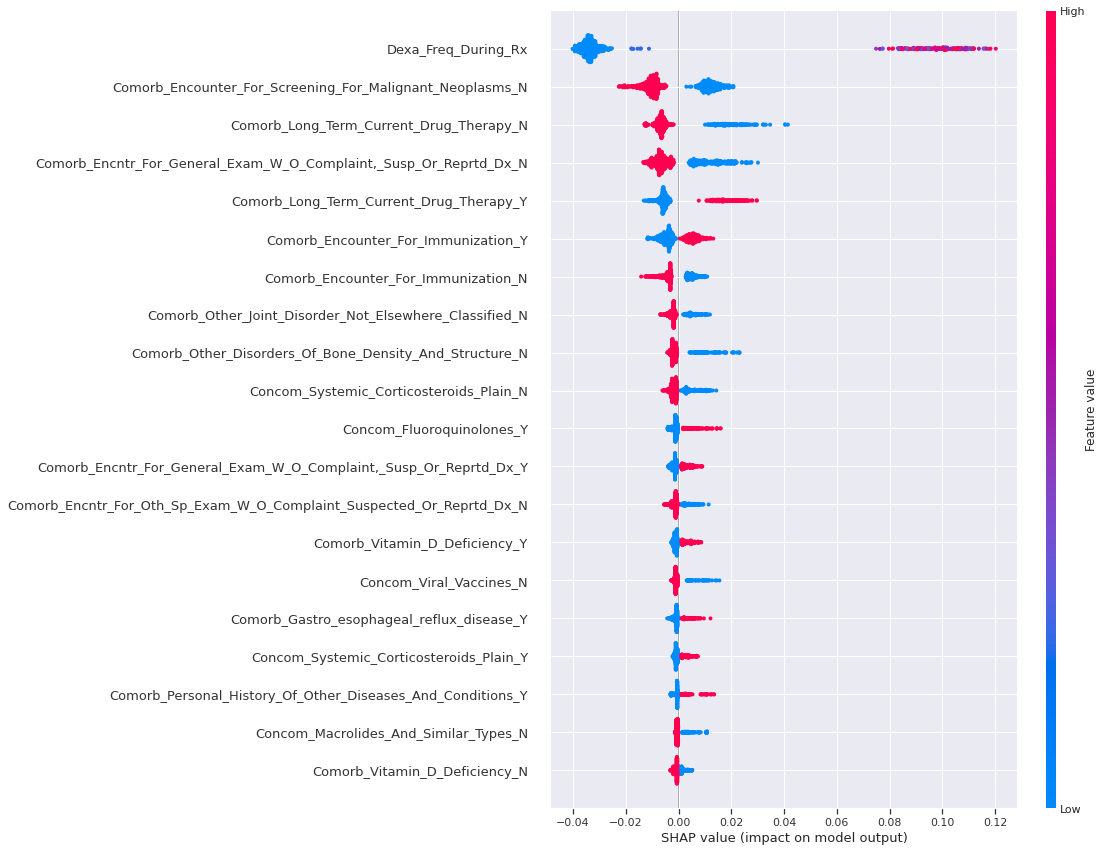

In [ ]:
train1, test1 = run_XGB(gridsearch_xgb, featurised_data, 'y', threshold, n_folds = k_fold, seed = seed)   